# Ideal ORE, Non-uniform
## Bayes Vulnerability

In [73]:
import collections
import math
import numpy as np
import pandas as pd
from scipy.special import perm # for nPk
from sympy.utilities.iterables import partitions, variations, multiset_permutations
from sympy.functions.combinatorial.numbers import stirling
from decimal import Decimal
import matplotlib.pyplot as plt 
pd.set_option('precision', 10)
%matplotlib inline

In [2]:
def uni_ore_bayes(n, k):
    outputs = 0
    inputs = 0
    for c in range(n):
        if k < c+1:
            break
        s2 = stirling(n, c+1)
        outputs = outputs + (math.factorial(c+1) * s2)
        inputs = inputs + (perm(k, c+1) * s2)
    return outputs / inputs

In [3]:
print(uni_ore_bayes(20, 20))

2.55364207863272e-5


In [4]:
def calc_max_prob(p, Pi):
    Pi.sort(reverse=True)
    frac = 1
    ind = 0
    val = -1
    for key in sorted(p.keys(), reverse=True):
        val = p[key]
        for i in range(val):
            frac = frac * pow(Pi[ind], key)
            ind = ind + 1
    return frac

In [94]:
def int_part_to_list(p):
    p_list = []
    for key in p.keys():
        for v in range(p[key]):
            p_list.append(key)
    return p_list

In [95]:
print(int_part_to_list({3: 1, 2: 2, 1: 3}))

[3, 2, 2, 1, 1, 1]


In [111]:
def ore_calc_max_prob(L, Pi):
    Pi.sort(reverse=True)
    prob = 1
    term = 1
    for x in range(len(L)):
        term = pow(Pi[x], L[x])
        prob = prob * term
    return prob

In [104]:
n = 10
k = 10
for p in partitions(n, m=k):
    print(p)

{10: 1}
{9: 1, 1: 1}
{8: 1, 2: 1}
{8: 1, 1: 2}
{7: 1, 3: 1}
{7: 1, 2: 1, 1: 1}
{7: 1, 1: 3}
{6: 1, 4: 1}
{6: 1, 3: 1, 1: 1}
{6: 1, 2: 2}
{6: 1, 2: 1, 1: 2}
{6: 1, 1: 4}
{5: 2}
{5: 1, 4: 1, 1: 1}
{5: 1, 3: 1, 2: 1}
{5: 1, 3: 1, 1: 2}
{5: 1, 2: 2, 1: 1}
{5: 1, 2: 1, 1: 3}
{5: 1, 1: 5}
{4: 2, 2: 1}
{4: 2, 1: 2}
{4: 1, 3: 2}
{4: 1, 3: 1, 2: 1, 1: 1}
{4: 1, 3: 1, 1: 3}
{4: 1, 2: 3}
{4: 1, 2: 2, 1: 2}
{4: 1, 2: 1, 1: 4}
{4: 1, 1: 6}
{3: 3, 1: 1}
{3: 2, 2: 2}
{3: 2, 2: 1, 1: 2}
{3: 2, 1: 4}
{3: 1, 2: 3, 1: 1}
{3: 1, 2: 2, 1: 3}
{3: 1, 2: 1, 1: 5}
{3: 1, 1: 7}
{2: 5}
{2: 4, 1: 2}
{2: 3, 1: 4}
{2: 2, 1: 6}
{2: 1, 1: 8}
{1: 10}


In [101]:
count = 0
for p in multiset_permutations([3, 2, 2, 1, 1, 1]):
    count = count + 1
    print(p)
print("count total: ", count)

[1, 1, 1, 2, 2, 3]
[1, 1, 1, 2, 3, 2]
[1, 1, 1, 3, 2, 2]
[1, 1, 2, 1, 2, 3]
[1, 1, 2, 1, 3, 2]
[1, 1, 2, 2, 1, 3]
[1, 1, 2, 2, 3, 1]
[1, 1, 2, 3, 1, 2]
[1, 1, 2, 3, 2, 1]
[1, 1, 3, 1, 2, 2]
[1, 1, 3, 2, 1, 2]
[1, 1, 3, 2, 2, 1]
[1, 2, 1, 1, 2, 3]
[1, 2, 1, 1, 3, 2]
[1, 2, 1, 2, 1, 3]
[1, 2, 1, 2, 3, 1]
[1, 2, 1, 3, 1, 2]
[1, 2, 1, 3, 2, 1]
[1, 2, 2, 1, 1, 3]
[1, 2, 2, 1, 3, 1]
[1, 2, 2, 3, 1, 1]
[1, 2, 3, 1, 1, 2]
[1, 2, 3, 1, 2, 1]
[1, 2, 3, 2, 1, 1]
[1, 3, 1, 1, 2, 2]
[1, 3, 1, 2, 1, 2]
[1, 3, 1, 2, 2, 1]
[1, 3, 2, 1, 1, 2]
[1, 3, 2, 1, 2, 1]
[1, 3, 2, 2, 1, 1]
[2, 1, 1, 1, 2, 3]
[2, 1, 1, 1, 3, 2]
[2, 1, 1, 2, 1, 3]
[2, 1, 1, 2, 3, 1]
[2, 1, 1, 3, 1, 2]
[2, 1, 1, 3, 2, 1]
[2, 1, 2, 1, 1, 3]
[2, 1, 2, 1, 3, 1]
[2, 1, 2, 3, 1, 1]
[2, 1, 3, 1, 1, 2]
[2, 1, 3, 1, 2, 1]
[2, 1, 3, 2, 1, 1]
[2, 2, 1, 1, 1, 3]
[2, 2, 1, 1, 3, 1]
[2, 2, 1, 3, 1, 1]
[2, 2, 3, 1, 1, 1]
[2, 3, 1, 1, 1, 2]
[2, 3, 1, 1, 2, 1]
[2, 3, 1, 2, 1, 1]
[2, 3, 2, 1, 1, 1]
[3, 1, 1, 1, 2, 2]
[3, 1, 1, 2, 1, 2]
[3, 1, 1, 2,

In [5]:
def calc_set_partitions(n,p):
    num = math.factorial(n)
    den = 1
    mul = 0
    for i in p.keys():
        mul = p[i]
        den = den * pow(math.factorial(i), mul) * math.factorial(mul)
    num_index = num / den
    return num_index

In [149]:
def ore_calc_set_partitions(n,p):
    num = math.factorial(n) # numerator is all blocks !
    den = 1
    for i in p.keys():
        den = den * math.factorial(i)
    sp = num / den
    return sp

In [148]:
ore_calc_set_partitions(3,{1:3})

6.0

In [158]:
def nonuni_ideal_ore_post_bayes(n, k, Pi):
    pbvsum = 0
    for p in partitions(n, m=k):
        p_list = int_part_to_list(p) # turn to list
        c = ore_calc_set_partitions(n,p) # check 
        insum = 0
        for msp in multiset_permutations(p_list): # for all multiset partitions,
            prob = ore_calc_max_prob(msp, Pi) # find probability for case
            val = c * prob # multipy by probability
            insum = insum + val
        pbvsum = pbvsum + insum # add to running sum
    return pbvsum

In [116]:
n = 20
k = 20
Pi = [1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20,1/20, 1/20, 1/20, 1/20,1/20, 1/20, 1/20, 1/20]
print(nonuni_ideal_ore_post_bayes(n, k, Pi))

p_list:  [20]
msp:  [20]
prob:  9.536743164062511e-27
p_list:  [19, 1]
msp:  [1, 19]
prob:  9.536743164062511e-27
msp:  [19, 1]
prob:  9.536743164062511e-27
p_list:  [18, 2]
msp:  [2, 18]
prob:  9.536743164062512e-27
msp:  [18, 2]
prob:  9.536743164062512e-27
p_list:  [18, 1, 1]
msp:  [1, 1, 18]
prob:  9.536743164062512e-27
msp:  [1, 18, 1]
prob:  9.536743164062511e-27
msp:  [18, 1, 1]
prob:  9.536743164062511e-27
p_list:  [17, 3]
msp:  [3, 17]
prob:  9.536743164062512e-27
msp:  [17, 3]
prob:  9.536743164062512e-27
p_list:  [17, 2, 1]
msp:  [1, 2, 17]
prob:  9.536743164062512e-27
msp:  [1, 17, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 17]
prob:  9.536743164062512e-27
msp:  [2, 17, 1]
prob:  9.536743164062512e-27
msp:  [17, 1, 2]
prob:  9.536743164062512e-27
msp:  [17, 2, 1]
prob:  9.536743164062512e-27
p_list:  [17, 1, 1, 1]
msp:  [1, 1, 1, 17]
prob:  9.536743164062512e-27
msp:  [1, 1, 17, 1]
prob:  9.536743164062512e-27
msp:  [1, 17, 1, 1]
prob:  9.536743164062511e-27
msp:  [17, 1,

msp:  [2, 1, 1, 1, 13, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 13]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 13, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 13, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 13, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 1, 1, 13]
prob:  9.536743164062511e-27
msp:  [2, 1, 2, 1, 13, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 2, 13, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 13, 1, 1, 2]
prob:  9.53674316406251e-27
msp:  [2, 1, 13, 1, 2, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 13, 2, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 2, 1, 1, 1, 13]
prob:  9.536743164062512e-27
msp:  [2, 2, 1, 1, 13, 1]
prob:  9.536743164062512e-27
msp:  [2, 2, 1, 13, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 2, 13, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 13, 1, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 13, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 13, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1

msp:  [12, 1, 1, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [12, 1, 2, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [12, 1, 2, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [12, 1, 2, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [12, 1, 3, 1, 1, 2]
prob:  9.53674316406251e-27
msp:  [12, 1, 3, 1, 2, 1]
prob:  9.536743164062511e-27
msp:  [12, 1, 3, 2, 1, 1]
prob:  9.536743164062511e-27
msp:  [12, 2, 1, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [12, 2, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [12, 2, 1, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [12, 2, 3, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [12, 3, 1, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [12, 3, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [12, 3, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [12, 3, 2, 1, 1, 1]
prob:  9.536743164062511e-27
p_list:  [12, 3, 1, 1, 1, 1, 1]
msp:  [1, 1, 1, 1, 1, 3, 12]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 12, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 3, 1, 12]

msp:  [5, 1, 1, 1, 11, 1]
prob:  9.536743164062511e-27
msp:  [5, 1, 1, 11, 1, 1]
prob:  9.536743164062511e-27
msp:  [5, 1, 11, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [5, 11, 1, 1, 1, 1]
prob:  9.53674316406251e-27
msp:  [11, 1, 1, 1, 1, 5]
prob:  9.536743164062511e-27
msp:  [11, 1, 1, 1, 5, 1]
prob:  9.536743164062511e-27
msp:  [11, 1, 1, 5, 1, 1]
prob:  9.53674316406251e-27
msp:  [11, 1, 5, 1, 1, 1]
prob:  9.53674316406251e-27
msp:  [11, 5, 1, 1, 1, 1]
prob:  9.53674316406251e-27
p_list:  [11, 4, 4, 1]
msp:  [1, 4, 4, 11]
prob:  9.53674316406251e-27
msp:  [1, 4, 11, 4]
prob:  9.53674316406251e-27
msp:  [1, 11, 4, 4]
prob:  9.536743164062508e-27
msp:  [4, 1, 4, 11]
prob:  9.53674316406251e-27
msp:  [4, 1, 11, 4]
prob:  9.53674316406251e-27
msp:  [4, 4, 1, 11]
prob:  9.53674316406251e-27
msp:  [4, 4, 11, 1]
prob:  9.53674316406251e-27
msp:  [4, 11, 1, 4]
prob:  9.536743164062511e-27
msp:  [4, 11, 4, 1]
prob:  9.536743164062511e-27
msp:  [11, 1, 4, 4]
prob:  9.536743164062508e-27
ms

msp:  [1, 2, 2, 11, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 1, 2, 11]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 1, 11, 2]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 2, 1, 11]
prob:  9.53674316406251e-27
msp:  [1, 2, 3, 2, 11, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 3, 11, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 11, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 11, 1, 2, 3]
prob:  9.536743164062512e-27
msp:  [1, 2, 11, 1, 3, 2]
prob:  9.536743164062512e-27
msp:  [1, 2, 11, 2, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 2, 11, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 11, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 2, 11, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 1, 2, 2, 11]
prob:  9.536743164062514e-27
msp:  [1, 3, 1, 2, 11, 2]
prob:  9.536743164062514e-27
msp:  [1, 3, 1, 11, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 3, 2, 1, 2, 11]
prob:  9.536743164062514e-27
msp:  [1, 3, 2, 1, 11, 2]
prob:  9.536743164062514e-27
msp:  [1, 3

msp:  [1, 2, 11, 1, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 2, 11, 1, 2, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 11, 2, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 2, 11, 2, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 11, 2, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 11, 1, 1, 2, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 11, 1, 2, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 11, 1, 2, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 11, 1, 2, 2, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 11, 2, 1, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 11, 2, 1, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 11, 2, 1, 2, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 11, 2, 2, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 11, 2, 2, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 11, 2, 2, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 2, 2, 11]
prob:  9.536743164062514e-27
msp:  [2, 1, 1, 1, 2, 11, 2]
prob:  9.536743164062514e-27
msp:  [2, 1, 1

msp:  [1, 1, 1, 6, 10, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 10, 1, 6]
prob:  9.536743164062511e-27
msp:  [1, 1, 1, 10, 6, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 6, 1, 1, 10]
prob:  9.536743164062511e-27
msp:  [1, 1, 6, 1, 10, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 6, 10, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 10, 1, 1, 6]
prob:  9.536743164062511e-27
msp:  [1, 1, 10, 1, 6, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 10, 6, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 6, 1, 1, 1, 10]
prob:  9.536743164062511e-27
msp:  [1, 6, 1, 1, 10, 1]
prob:  9.536743164062511e-27
msp:  [1, 6, 1, 10, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 6, 10, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 10, 1, 1, 1, 6]
prob:  9.536743164062511e-27
msp:  [1, 10, 1, 1, 6, 1]
prob:  9.536743164062511e-27
msp:  [1, 10, 1, 6, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 10, 6, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [6, 1, 1, 1, 1, 10]
prob:  9.536743164062511e-27
msp:  [6, 

prob:  9.536743164062511e-27
msp:  [1, 10, 1, 4, 3, 1]
prob:  9.53674316406251e-27
msp:  [1, 10, 3, 1, 1, 4]
prob:  9.536743164062511e-27
msp:  [1, 10, 3, 1, 4, 1]
prob:  9.536743164062511e-27
msp:  [1, 10, 3, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 10, 4, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 10, 4, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 10, 4, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [3, 1, 1, 1, 4, 10]
prob:  9.536743164062511e-27
msp:  [3, 1, 1, 1, 10, 4]
prob:  9.536743164062511e-27
msp:  [3, 1, 1, 4, 1, 10]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 4, 10, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 10, 1, 4]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 10, 4, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 4, 1, 1, 10]
prob:  9.536743164062511e-27
msp:  [3, 1, 4, 1, 10, 1]
prob:  9.536743164062511e-27
msp:  [3, 1, 4, 10, 1, 1]
prob:  9.536743164062511e-27
msp:  [3, 1, 10, 1, 1, 4]
prob:  9.536743164062512e-27
msp:  [3, 1, 10, 1, 4, 1]
prob:  9.53

msp:  [1, 1, 4, 1, 1, 1, 1, 10]
prob:  9.536743164062511e-27
msp:  [1, 1, 4, 1, 1, 1, 10, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 4, 1, 1, 10, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 4, 1, 10, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 4, 10, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 10, 1, 1, 1, 1, 4]
prob:  9.536743164062511e-27
msp:  [1, 1, 10, 1, 1, 1, 4, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 10, 1, 1, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 10, 1, 4, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 10, 4, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 4, 1, 1, 1, 1, 1, 10]
prob:  9.536743164062511e-27
msp:  [1, 4, 1, 1, 1, 1, 10, 1]
prob:  9.536743164062511e-27
msp:  [1, 4, 1, 1, 1, 10, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 4, 1, 1, 10, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 4, 1, 10, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 4, 10, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 10, 1, 1, 1, 1

prob:  9.536743164062515e-27
msp:  [1, 2, 1, 1, 2, 3, 10]
prob:  9.536743164062512e-27
msp:  [1, 2, 1, 1, 2, 10, 3]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 1, 3, 2, 10]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 1, 3, 10, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 1, 10, 2, 3]
prob:  9.536743164062515e-27
msp:  [1, 2, 1, 1, 10, 3, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 2, 1, 3, 10]
prob:  9.536743164062512e-27
msp:  [1, 2, 1, 2, 1, 10, 3]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 2, 3, 1, 10]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 2, 3, 10, 1]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 2, 10, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 2, 10, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 1, 3, 1, 2, 10]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 3, 1, 10, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 3, 2, 1, 10]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 3, 2, 10, 1]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 3, 10, 1, 2]
prob:  9.53674

prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 1, 1, 10, 3]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 1, 3, 1, 10]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 1, 3, 10, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 1, 10, 1, 3]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 1, 10, 3, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 3, 1, 1, 10]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 3, 1, 10, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 3, 10, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 10, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [2, 1, 1, 1, 10, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 10, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 3, 1, 1, 1, 10]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 3, 1, 1, 10, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 3, 1, 10, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 3, 10, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 10, 1, 1, 1, 3]
prob:  9.536743164062514

prob:  9.536743164062514e-27
msp:  [2, 1, 10, 1, 1, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [2, 1, 10, 1, 1, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 10, 1, 1, 2, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 10, 1, 2, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 10, 1, 2, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 10, 1, 2, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 10, 2, 1, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [2, 1, 10, 2, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 10, 2, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 10, 2, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [2, 2, 1, 1, 1, 1, 2, 10]
prob:  9.536743164062514e-27
msp:  [2, 2, 1, 1, 1, 1, 10, 2]
prob:  9.536743164062514e-27
msp:  [2, 2, 1, 1, 1, 2, 1, 10]
prob:  9.536743164062514e-27
msp:  [2, 2, 1, 1, 1, 2, 10, 1]
prob:  9.536743164062514e-27
msp:  [2, 2, 1, 1, 1, 10, 1, 2]
prob:  9.536743164062514e-27
msp:  [2, 2, 1, 1, 1, 10, 2, 1]
prob:  9.536743164062512

msp:  [8, 1, 1, 9, 1]
prob:  9.536743164062511e-27
msp:  [8, 1, 9, 1, 1]
prob:  9.536743164062511e-27
msp:  [8, 9, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [9, 1, 1, 1, 8]
prob:  9.536743164062511e-27
msp:  [9, 1, 1, 8, 1]
prob:  9.536743164062511e-27
msp:  [9, 1, 8, 1, 1]
prob:  9.536743164062511e-27
msp:  [9, 8, 1, 1, 1]
prob:  9.536743164062511e-27
p_list:  [9, 7, 4]
msp:  [4, 7, 9]
prob:  9.53674316406251e-27
msp:  [4, 9, 7]
prob:  9.53674316406251e-27
msp:  [7, 4, 9]
prob:  9.53674316406251e-27
msp:  [7, 9, 4]
prob:  9.53674316406251e-27
msp:  [9, 4, 7]
prob:  9.53674316406251e-27
msp:  [9, 7, 4]
prob:  9.53674316406251e-27
p_list:  [9, 7, 3, 1]
msp:  [1, 3, 7, 9]
prob:  9.536743164062511e-27
msp:  [1, 3, 9, 7]
prob:  9.536743164062511e-27
msp:  [1, 7, 3, 9]
prob:  9.53674316406251e-27
msp:  [1, 7, 9, 3]
prob:  9.536743164062511e-27
msp:  [1, 9, 3, 7]
prob:  9.536743164062511e-27
msp:  [1, 9, 7, 3]
prob:  9.536743164062511e-27
msp:  [3, 1, 7, 9]
prob:  9.536743164062511e-27
msp

msp:  [4, 2, 5, 9]
prob:  9.53674316406251e-27
msp:  [4, 2, 9, 5]
prob:  9.536743164062511e-27
msp:  [4, 5, 2, 9]
prob:  9.536743164062511e-27
msp:  [4, 5, 9, 2]
prob:  9.536743164062512e-27
msp:  [4, 9, 2, 5]
prob:  9.536743164062511e-27
msp:  [4, 9, 5, 2]
prob:  9.53674316406251e-27
msp:  [5, 2, 4, 9]
prob:  9.536743164062511e-27
msp:  [5, 2, 9, 4]
prob:  9.536743164062511e-27
msp:  [5, 4, 2, 9]
prob:  9.536743164062511e-27
msp:  [5, 4, 9, 2]
prob:  9.536743164062512e-27
msp:  [5, 9, 2, 4]
prob:  9.536743164062511e-27
msp:  [5, 9, 4, 2]
prob:  9.536743164062512e-27
msp:  [9, 2, 4, 5]
prob:  9.536743164062511e-27
msp:  [9, 2, 5, 4]
prob:  9.536743164062511e-27
msp:  [9, 4, 2, 5]
prob:  9.536743164062511e-27
msp:  [9, 4, 5, 2]
prob:  9.53674316406251e-27
msp:  [9, 5, 2, 4]
prob:  9.536743164062511e-27
msp:  [9, 5, 4, 2]
prob:  9.536743164062512e-27
p_list:  [9, 5, 4, 1, 1]
msp:  [1, 1, 4, 5, 9]
prob:  9.53674316406251e-27
msp:  [1, 1, 4, 9, 5]
prob:  9.536743164062511e-27
msp:  [1, 1, 

msp:  [5, 9, 2, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [5, 9, 2, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [5, 9, 2, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [9, 1, 1, 2, 2, 5]
prob:  9.536743164062512e-27
msp:  [9, 1, 1, 2, 5, 2]
prob:  9.536743164062512e-27
msp:  [9, 1, 1, 5, 2, 2]
prob:  9.536743164062512e-27
msp:  [9, 1, 2, 1, 2, 5]
prob:  9.536743164062512e-27
msp:  [9, 1, 2, 1, 5, 2]
prob:  9.536743164062512e-27
msp:  [9, 1, 2, 2, 1, 5]
prob:  9.536743164062512e-27
msp:  [9, 1, 2, 2, 5, 1]
prob:  9.536743164062512e-27
msp:  [9, 1, 2, 5, 1, 2]
prob:  9.536743164062512e-27
msp:  [9, 1, 2, 5, 2, 1]
prob:  9.536743164062512e-27
msp:  [9, 1, 5, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [9, 1, 5, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [9, 1, 5, 2, 2, 1]
prob:  9.536743164062512e-27
msp:  [9, 2, 1, 1, 2, 5]
prob:  9.536743164062512e-27
msp:  [9, 2, 1, 1, 5, 2]
prob:  9.536743164062512e-27
msp:  [9, 2, 1, 2, 1, 5]
prob:  9.536743164062512e-27
msp:  [9, 2, 1, 2, 5, 1]
pro

prob:  9.536743164062512e-27
msp:  [1, 2, 1, 4, 3, 9]
prob:  9.536743164062511e-27
msp:  [1, 2, 1, 4, 9, 3]
prob:  9.536743164062512e-27
msp:  [1, 2, 1, 9, 3, 4]
prob:  9.536743164062511e-27
msp:  [1, 2, 1, 9, 4, 3]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 1, 4, 9]
prob:  9.536743164062511e-27
msp:  [1, 2, 3, 1, 9, 4]
prob:  9.536743164062511e-27
msp:  [1, 2, 3, 4, 1, 9]
prob:  9.53674316406251e-27
msp:  [1, 2, 3, 4, 9, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 3, 9, 1, 4]
prob:  9.536743164062511e-27
msp:  [1, 2, 3, 9, 4, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 4, 1, 3, 9]
prob:  9.536743164062511e-27
msp:  [1, 2, 4, 1, 9, 3]
prob:  9.536743164062512e-27
msp:  [1, 2, 4, 3, 1, 9]
prob:  9.536743164062511e-27
msp:  [1, 2, 4, 3, 9, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 4, 9, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 2, 4, 9, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 9, 1, 3, 4]
prob:  9.536743164062511e-27
msp:  [1, 2, 9, 1, 4, 3]
prob:  9.536743164062512e-27


msp:  [4, 1, 3, 9, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 1, 9, 1, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [4, 1, 9, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [4, 1, 9, 1, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 1, 9, 3, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 3, 1, 1, 1, 1, 9]
prob:  9.53674316406251e-27
msp:  [4, 3, 1, 1, 1, 9, 1]
prob:  9.536743164062511e-27
msp:  [4, 3, 1, 1, 9, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 3, 1, 9, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 3, 9, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 9, 1, 1, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [4, 9, 1, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [4, 9, 1, 1, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 9, 1, 3, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 9, 3, 1, 1, 1, 1]
prob:  9.53674316406251e-27
msp:  [9, 1, 1, 1, 1, 3, 4]
prob:  9.53674316406251e-27
msp:  [9, 1, 1, 1, 1, 4, 3]
prob:  9.536743164062511e-27
msp:  [9, 1, 1, 1, 3, 1, 4]
prob: 

msp:  [2, 2, 4, 1, 1, 9, 1]
prob:  9.536743164062512e-27
msp:  [2, 2, 4, 1, 9, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 2, 4, 9, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 2, 9, 1, 1, 1, 4]
prob:  9.536743164062512e-27
msp:  [2, 2, 9, 1, 1, 4, 1]
prob:  9.536743164062512e-27
msp:  [2, 2, 9, 1, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 2, 9, 4, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 4, 1, 1, 1, 2, 9]
prob:  9.536743164062511e-27
msp:  [2, 4, 1, 1, 1, 9, 2]
prob:  9.536743164062512e-27
msp:  [2, 4, 1, 1, 2, 1, 9]
prob:  9.536743164062511e-27
msp:  [2, 4, 1, 1, 2, 9, 1]
prob:  9.536743164062512e-27
msp:  [2, 4, 1, 1, 9, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 4, 1, 1, 9, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 4, 1, 2, 1, 1, 9]
prob:  9.536743164062511e-27
msp:  [2, 4, 1, 2, 1, 9, 1]
prob:  9.536743164062512e-27
msp:  [2, 4, 1, 2, 9, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 4, 1, 9, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 4, 1, 9, 1, 2, 1]
pro

prob:  9.536743164062512e-27
msp:  [9, 4, 1, 1, 2, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [9, 4, 1, 2, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [9, 4, 2, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
p_list:  [9, 4, 1, 1, 1, 1, 1, 1, 1]
msp:  [1, 1, 1, 1, 1, 1, 1, 4, 9]
prob:  9.536743164062511e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 9, 4]
prob:  9.536743164062511e-27
msp:  [1, 1, 1, 1, 1, 1, 4, 1, 9]
prob:  9.53674316406251e-27
msp:  [1, 1, 1, 1, 1, 1, 4, 9, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 1, 1, 1, 1, 9, 1, 4]
prob:  9.536743164062511e-27
msp:  [1, 1, 1, 1, 1, 1, 9, 4, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 1, 1, 1, 4, 1, 1, 9]
prob:  9.536743164062511e-27
msp:  [1, 1, 1, 1, 1, 4, 1, 9, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 4, 9, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 9, 1, 1, 4]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 9, 1, 4, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 9, 4, 1, 1]
prob:  9.536743164062511e-27

msp:  [1, 9, 2, 1, 1, 3, 3]
prob:  9.536743164062512e-27
msp:  [1, 9, 2, 1, 3, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 9, 2, 1, 3, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 9, 2, 3, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 9, 2, 3, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 9, 2, 3, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 9, 3, 1, 1, 2, 3]
prob:  9.536743164062512e-27
msp:  [1, 9, 3, 1, 1, 3, 2]
prob:  9.536743164062512e-27
msp:  [1, 9, 3, 1, 2, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 9, 3, 1, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 9, 3, 1, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 9, 3, 1, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 9, 3, 2, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 9, 3, 2, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 9, 3, 2, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 9, 3, 3, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 9, 3, 3, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 9, 3, 3, 2, 1, 1]
pro

msp:  [1, 2, 2, 2, 9, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 2, 2, 2, 9, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 3, 1, 2, 9]
prob:  9.536743164062514e-27
msp:  [1, 2, 2, 3, 1, 9, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 2, 3, 2, 1, 9]
prob:  9.536743164062515e-27
msp:  [1, 2, 2, 3, 2, 9, 1]
prob:  9.536743164062514e-27
msp:  [1, 2, 2, 3, 9, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 2, 3, 9, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 9, 1, 2, 3]
prob:  9.536743164062515e-27
msp:  [1, 2, 2, 9, 1, 3, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 2, 9, 2, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 2, 2, 9, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 9, 3, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 2, 9, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 1, 2, 2, 9]
prob:  9.536743164062514e-27
msp:  [1, 2, 3, 1, 2, 9, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 3, 1, 9, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 3, 2, 1, 2, 9]
pro

prob:  9.536743164062511e-27
msp:  [1, 2, 2, 1, 3, 1, 9, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 1, 3, 9, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 1, 9, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 1, 9, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 1, 9, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 2, 3, 1, 1, 1, 9]
prob:  9.536743164062511e-27
msp:  [1, 2, 2, 3, 1, 1, 9, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 3, 1, 9, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 3, 9, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 9, 1, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 2, 2, 9, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 9, 1, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 9, 3, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 1, 1, 1, 2, 9]
prob:  9.536743164062511e-27
msp:  [1, 2, 3, 1, 1, 1, 9, 2]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 1, 1, 2, 1, 9]
prob:  9.536743164062511e-27
msp:  [1, 2

msp:  [1, 1, 1, 1, 2, 3, 1, 9, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 1, 2, 3, 9, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 1, 2, 9, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 1, 2, 9, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 2, 9, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 3, 1, 1, 2, 9]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 1, 3, 1, 1, 9, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 1, 3, 1, 2, 1, 9]
prob:  9.536743164062515e-27
msp:  [1, 1, 1, 1, 3, 1, 2, 9, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 1, 3, 1, 9, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 1, 3, 1, 9, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 3, 2, 1, 1, 9]
prob:  9.536743164062515e-27
msp:  [1, 1, 1, 1, 3, 2, 1, 9, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 1, 3, 2, 9, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 1, 3, 9, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 1, 3, 9, 1, 2, 1]
prob:  9.536743164062

msp:  [1, 1, 2, 2, 2, 1, 9, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 2, 2, 2, 1, 9]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 2, 2, 2, 9, 1]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 2, 2, 9, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 2, 2, 9, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 2, 9, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 2, 9, 2, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 2, 9, 2, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 9, 1, 2, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 9, 2, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 9, 2, 2, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 9, 2, 2, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 1, 9, 1, 2, 2, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 9, 2, 1, 2, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 9, 2, 2, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 9, 2, 2, 2, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 9, 2, 2, 2, 2, 1]
prob:  9.

prob:  9.536743164062512e-27
msp:  [1, 2, 9, 1, 2, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 9, 1, 2, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 2, 9, 2, 1, 1, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 9, 2, 1, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 9, 2, 1, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 9, 2, 1, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 2, 9, 2, 2, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 9, 1, 1, 1, 1, 2, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 9, 1, 1, 1, 2, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 9, 1, 1, 1, 2, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 9, 1, 1, 1, 2, 2, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 9, 1, 1, 2, 1, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 9, 1, 1, 2, 1, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 9, 1, 1, 2, 1, 2, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 9, 1, 1, 2, 2, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 9, 1, 1, 2, 2, 1

msp:  [9, 2, 1, 2, 1, 1, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [9, 2, 2, 1, 1, 1, 1, 1, 1, 1]
prob:  9.536743164062512e-27
p_list:  [9, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
msp:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 9]
prob:  9.536743164062511e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 2]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 9]
prob:  9.536743164062511e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 1, 2, 9, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 1, 9, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 9]
prob:  9.536743164062511e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 2, 1, 9, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 2, 9, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 9, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 9, 2, 1, 1]
prob:  9.536743164062512e-

msp:  [6, 1, 4, 8, 1]
prob:  9.536743164062512e-27
msp:  [6, 1, 8, 1, 4]
prob:  9.536743164062512e-27
msp:  [6, 1, 8, 4, 1]
prob:  9.536743164062512e-27
msp:  [6, 4, 1, 1, 8]
prob:  9.536743164062511e-27
msp:  [6, 4, 1, 8, 1]
prob:  9.536743164062511e-27
msp:  [6, 4, 8, 1, 1]
prob:  9.536743164062511e-27
msp:  [6, 8, 1, 1, 4]
prob:  9.536743164062512e-27
msp:  [6, 8, 1, 4, 1]
prob:  9.536743164062512e-27
msp:  [6, 8, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [8, 1, 1, 4, 6]
prob:  9.536743164062511e-27
msp:  [8, 1, 1, 6, 4]
prob:  9.536743164062511e-27
msp:  [8, 1, 4, 1, 6]
prob:  9.536743164062511e-27
msp:  [8, 1, 4, 6, 1]
prob:  9.536743164062511e-27
msp:  [8, 1, 6, 1, 4]
prob:  9.536743164062511e-27
msp:  [8, 1, 6, 4, 1]
prob:  9.536743164062511e-27
msp:  [8, 4, 1, 1, 6]
prob:  9.536743164062511e-27
msp:  [8, 4, 1, 6, 1]
prob:  9.536743164062512e-27
msp:  [8, 4, 6, 1, 1]
prob:  9.536743164062512e-27
msp:  [8, 6, 1, 1, 4]
prob:  9.536743164062512e-27
msp:  [8, 6, 1, 4, 1]
prob:  9.

msp:  [2, 8, 6, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [6, 1, 1, 1, 1, 2, 8]
prob:  9.536743164062512e-27
msp:  [6, 1, 1, 1, 1, 8, 2]
prob:  9.536743164062512e-27
msp:  [6, 1, 1, 1, 2, 1, 8]
prob:  9.536743164062512e-27
msp:  [6, 1, 1, 1, 2, 8, 1]
prob:  9.536743164062512e-27
msp:  [6, 1, 1, 1, 8, 1, 2]
prob:  9.536743164062512e-27
msp:  [6, 1, 1, 1, 8, 2, 1]
prob:  9.536743164062512e-27
msp:  [6, 1, 1, 2, 1, 1, 8]
prob:  9.536743164062512e-27
msp:  [6, 1, 1, 2, 1, 8, 1]
prob:  9.536743164062512e-27
msp:  [6, 1, 1, 2, 8, 1, 1]
prob:  9.536743164062512e-27
msp:  [6, 1, 1, 8, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [6, 1, 1, 8, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [6, 1, 1, 8, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [6, 1, 2, 1, 1, 1, 8]
prob:  9.536743164062512e-27
msp:  [6, 1, 2, 1, 1, 8, 1]
prob:  9.536743164062512e-27
msp:  [6, 1, 2, 1, 8, 1, 1]
prob:  9.536743164062512e-27
msp:  [6, 1, 2, 8, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [6, 1, 8, 1, 1, 1, 2]
pro

msp:  [1, 5, 1, 8, 3, 2]
prob:  9.536743164062514e-27
msp:  [1, 5, 2, 1, 3, 8]
prob:  9.536743164062512e-27
msp:  [1, 5, 2, 1, 8, 3]
prob:  9.536743164062512e-27
msp:  [1, 5, 2, 3, 1, 8]
prob:  9.536743164062512e-27
msp:  [1, 5, 2, 3, 8, 1]
prob:  9.536743164062512e-27
msp:  [1, 5, 2, 8, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 5, 2, 8, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 5, 3, 1, 2, 8]
prob:  9.536743164062512e-27
msp:  [1, 5, 3, 1, 8, 2]
prob:  9.536743164062514e-27
msp:  [1, 5, 3, 2, 1, 8]
prob:  9.536743164062514e-27
msp:  [1, 5, 3, 2, 8, 1]
prob:  9.536743164062514e-27
msp:  [1, 5, 3, 8, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 5, 3, 8, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 5, 8, 1, 2, 3]
prob:  9.536743164062515e-27
msp:  [1, 5, 8, 1, 3, 2]
prob:  9.536743164062514e-27
msp:  [1, 5, 8, 2, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 5, 8, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 5, 8, 3, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 5, 8, 3, 2, 1]
pro

prob:  9.536743164062514e-27
msp:  [1, 1, 1, 8, 5, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 1, 2, 5, 8]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 1, 2, 8, 5]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 1, 5, 2, 8]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 1, 5, 8, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 1, 8, 2, 5]
prob:  9.536743164062517e-27
msp:  [1, 1, 2, 1, 8, 5, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 2, 1, 5, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 2, 1, 8, 5]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 2, 5, 1, 8]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 2, 5, 8, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 2, 8, 1, 5]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 2, 8, 5, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 5, 1, 2, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 5, 1, 8, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 5, 2, 1, 8]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 5, 2, 8, 1]
prob:  9.536743164062514e-27
ms

msp:  [2, 1, 1, 1, 1, 8, 5, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 5, 1, 1, 8]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 5, 1, 8, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 5, 8, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 8, 1, 1, 5]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 8, 1, 5, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 8, 5, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 5, 1, 1, 1, 8]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 5, 1, 1, 8, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 5, 1, 8, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 5, 8, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 8, 1, 1, 1, 5]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 8, 1, 1, 5, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 8, 1, 5, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 8, 5, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 5, 1, 1, 1, 1, 8]
prob:  9.536743164062511e-27
msp:  [2, 1, 5, 1, 1, 1, 8, 1]
prob:  9.

prob:  9.536743164062514e-27
msp:  [8, 2, 4, 3, 3]
prob:  9.536743164062512e-27
msp:  [8, 3, 2, 3, 4]
prob:  9.536743164062514e-27
msp:  [8, 3, 2, 4, 3]
prob:  9.536743164062514e-27
msp:  [8, 3, 3, 2, 4]
prob:  9.536743164062512e-27
msp:  [8, 3, 3, 4, 2]
prob:  9.536743164062512e-27
msp:  [8, 3, 4, 2, 3]
prob:  9.536743164062512e-27
msp:  [8, 3, 4, 3, 2]
prob:  9.536743164062512e-27
msp:  [8, 4, 2, 3, 3]
prob:  9.536743164062514e-27
msp:  [8, 4, 3, 2, 3]
prob:  9.536743164062515e-27
msp:  [8, 4, 3, 3, 2]
prob:  9.536743164062514e-27
p_list:  [8, 4, 3, 3, 1, 1]
msp:  [1, 1, 3, 3, 4, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 3, 3, 8, 4]
prob:  9.536743164062514e-27
msp:  [1, 1, 3, 4, 3, 8]
prob:  9.536743164062514e-27
msp:  [1, 1, 3, 4, 8, 3]
prob:  9.536743164062514e-27
msp:  [1, 1, 3, 8, 3, 4]
prob:  9.536743164062514e-27
msp:  [1, 1, 3, 8, 4, 3]
prob:  9.536743164062514e-27
msp:  [1, 1, 4, 3, 3, 8]
prob:  9.536743164062514e-27
msp:  [1, 1, 4, 3, 8, 3]
prob:  9.536743164062514e-27
m

prob:  9.536743164062514e-27
msp:  [1, 1, 4, 1, 2, 8, 3]
prob:  9.536743164062514e-27
msp:  [1, 1, 4, 1, 3, 2, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 4, 1, 3, 8, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 4, 1, 8, 2, 3]
prob:  9.536743164062515e-27
msp:  [1, 1, 4, 1, 8, 3, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 4, 2, 1, 3, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 4, 2, 1, 8, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 4, 2, 3, 1, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 4, 2, 3, 8, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 4, 2, 8, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 1, 4, 2, 8, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 4, 3, 1, 2, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 4, 3, 1, 8, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 4, 3, 2, 1, 8]
prob:  9.536743164062514e-27
msp:  [1, 1, 4, 3, 2, 8, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 4, 3, 8, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 4, 3, 8, 2, 1]
prob:  9.536743164062512e-27
ms

prob:  9.536743164062512e-27
msp:  [4, 3, 8, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 3, 8, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [4, 8, 1, 1, 1, 2, 3]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 1, 1, 3, 2]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 1, 2, 1, 3]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 1, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 1, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 1, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 2, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [4, 8, 1, 2, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 2, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 3, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 3, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 3, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 8, 2, 1, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [4, 8, 2, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [4, 8, 2, 1, 3, 1, 1]
prob:  9.536743164062512e-27
ms

prob:  9.536743164062515e-27
msp:  [1, 1, 2, 8, 2, 2, 4]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 8, 2, 4, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 8, 4, 2, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 4, 2, 2, 2, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 4, 2, 2, 8, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 4, 2, 8, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 4, 8, 2, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 8, 2, 2, 2, 4]
prob:  9.536743164062512e-27
msp:  [1, 1, 8, 2, 2, 4, 2]
prob:  9.536743164062512e-27
msp:  [1, 1, 8, 2, 4, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 8, 4, 2, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 2, 2, 4, 8]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 2, 2, 8, 4]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 2, 4, 2, 8]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 2, 4, 8, 2]
prob:  9.536743164062515e-27
msp:  [1, 2, 1, 2, 8, 2, 4]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 2, 8, 4, 2]
prob:  9.536743164062514e-27
ms

prob:  9.536743164062514e-27
msp:  [1, 1, 2, 1, 2, 8, 1, 4]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 1, 2, 8, 4, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 1, 4, 1, 2, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 1, 4, 1, 8, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 1, 4, 2, 1, 8]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 1, 4, 2, 8, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 1, 4, 8, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 1, 4, 8, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 1, 8, 1, 2, 4]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 1, 8, 1, 4, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 1, 8, 2, 1, 4]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 1, 8, 2, 4, 1]
prob:  9.536743164062517e-27
msp:  [1, 1, 2, 1, 8, 4, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 1, 8, 4, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 2, 1, 1, 4, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 2, 1, 1, 8, 4]
prob:  9.536743164062514e-27
msp:  [1, 1

msp:  [4, 2, 1, 1, 1, 8, 1, 2]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 1, 1, 8, 2, 1]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 1, 2, 1, 1, 8]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 1, 2, 1, 8, 1]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 1, 2, 8, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 1, 8, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [4, 2, 1, 1, 8, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 1, 8, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 2, 1, 1, 1, 8]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 2, 1, 1, 8, 1]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 2, 1, 8, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 2, 8, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 8, 1, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [4, 2, 1, 8, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 8, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 8, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [4, 2, 2, 1, 1, 1, 1, 8]
prob:  9.

msp:  [4, 1, 8, 1, 1, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [4, 1, 8, 1, 1, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 1, 8, 1, 1, 2, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 1, 8, 1, 2, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 1, 8, 2, 1, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 1, 1, 1, 1, 1, 8]
prob:  9.536743164062511e-27
msp:  [4, 2, 1, 1, 1, 1, 1, 8, 1]
prob:  9.536743164062511e-27
msp:  [4, 2, 1, 1, 1, 1, 8, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 2, 1, 1, 1, 8, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 2, 1, 1, 8, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 2, 1, 8, 1, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 2, 8, 1, 1, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 1, 1, 1, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 1, 1, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 1, 1, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 8, 1, 1, 1, 2, 1, 1, 1]
prob:  9.536743164062

prob:  9.536743164062512e-27
msp:  [1, 2, 3, 1, 3, 8, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 3, 1, 8, 2, 3]
prob:  9.536743164062515e-27
msp:  [1, 2, 3, 1, 8, 3, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 3, 2, 1, 3, 8]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 2, 1, 8, 3]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 2, 3, 1, 8]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 2, 3, 8, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 2, 8, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 2, 3, 2, 8, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 3, 1, 2, 8]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 3, 1, 8, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 3, 3, 2, 1, 8]
prob:  9.536743164062514e-27
msp:  [1, 2, 3, 3, 2, 8, 1]
prob:  9.536743164062514e-27
msp:  [1, 2, 3, 3, 8, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 3, 3, 8, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 8, 1, 2, 3]
prob:  9.536743164062515e-27
msp:  [1, 2, 3, 8, 1, 3, 2]
prob:  9.536743164062514e-27
ms

prob:  9.536743164062514e-27
msp:  [8, 1, 2, 3, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [8, 1, 3, 1, 2, 2, 3]
prob:  9.536743164062515e-27
msp:  [8, 1, 3, 1, 2, 3, 2]
prob:  9.536743164062514e-27
msp:  [8, 1, 3, 1, 3, 2, 2]
prob:  9.536743164062514e-27
msp:  [8, 1, 3, 2, 1, 2, 3]
prob:  9.536743164062515e-27
msp:  [8, 1, 3, 2, 1, 3, 2]
prob:  9.536743164062514e-27
msp:  [8, 1, 3, 2, 2, 1, 3]
prob:  9.536743164062514e-27
msp:  [8, 1, 3, 2, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [8, 1, 3, 2, 3, 1, 2]
prob:  9.536743164062514e-27
msp:  [8, 1, 3, 2, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [8, 1, 3, 3, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [8, 1, 3, 3, 2, 1, 2]
prob:  9.536743164062515e-27
msp:  [8, 1, 3, 3, 2, 2, 1]
prob:  9.536743164062515e-27
msp:  [8, 2, 1, 1, 2, 3, 3]
prob:  9.536743164062514e-27
msp:  [8, 2, 1, 1, 3, 2, 3]
prob:  9.536743164062515e-27
msp:  [8, 2, 1, 1, 3, 3, 2]
prob:  9.536743164062514e-27
msp:  [8, 2, 1, 2, 1, 3, 3]
prob:  9.536743164062514e-27
ms

prob:  9.536743164062512e-27
msp:  [2, 3, 3, 1, 1, 8, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 3, 3, 1, 8, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 3, 3, 8, 1, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [2, 3, 8, 1, 1, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [2, 3, 8, 1, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [2, 3, 8, 1, 1, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 3, 8, 1, 3, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 3, 8, 3, 1, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [2, 8, 1, 1, 1, 1, 3, 3]
prob:  9.536743164062512e-27
msp:  [2, 8, 1, 1, 1, 3, 1, 3]
prob:  9.536743164062512e-27
msp:  [2, 8, 1, 1, 1, 3, 3, 1]
prob:  9.536743164062512e-27
msp:  [2, 8, 1, 1, 3, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [2, 8, 1, 1, 3, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [2, 8, 1, 1, 3, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 8, 1, 3, 1, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [2, 8, 1, 3, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [2, 8

prob:  9.536743164062512e-27
msp:  [3, 1, 1, 1, 8, 1, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 1, 8, 3, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 3, 1, 1, 1, 1, 8]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 3, 1, 1, 1, 8, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 3, 1, 1, 8, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 3, 1, 8, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 3, 8, 1, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [3, 1, 1, 8, 1, 1, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [3, 1, 1, 8, 1, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 8, 1, 1, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 8, 1, 3, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 8, 3, 1, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [3, 1, 3, 1, 1, 1, 1, 1, 8]
prob:  9.536743164062512e-27
msp:  [3, 1, 3, 1, 1, 1, 1, 8, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 3, 1, 1, 1, 8, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 3, 1, 1, 8, 1

msp:  [1, 2, 1, 1, 2, 3, 2, 8]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 1, 2, 3, 8, 2]
prob:  9.536743164062515e-27
msp:  [1, 2, 1, 1, 2, 8, 2, 3]
prob:  9.536743164062515e-27
msp:  [1, 2, 1, 1, 2, 8, 3, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 1, 3, 2, 2, 8]
prob:  9.536743164062517e-27
msp:  [1, 2, 1, 1, 3, 2, 8, 2]
prob:  9.536743164062515e-27
msp:  [1, 2, 1, 1, 3, 8, 2, 2]
prob:  9.536743164062515e-27
msp:  [1, 2, 1, 1, 8, 2, 2, 3]
prob:  9.536743164062515e-27
msp:  [1, 2, 1, 1, 8, 2, 3, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 1, 8, 3, 2, 2]
prob:  9.536743164062515e-27
msp:  [1, 2, 1, 2, 1, 2, 3, 8]
prob:  9.536743164062517e-27
msp:  [1, 2, 1, 2, 1, 2, 8, 3]
prob:  9.536743164062517e-27
msp:  [1, 2, 1, 2, 1, 3, 2, 8]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 2, 1, 3, 8, 2]
prob:  9.536743164062515e-27
msp:  [1, 2, 1, 2, 1, 8, 2, 3]
prob:  9.536743164062515e-27
msp:  [1, 2, 1, 2, 1, 8, 3, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 1, 2, 2, 1, 3, 8]
prob:  9.

msp:  [2, 3, 1, 8, 2, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [2, 3, 1, 8, 2, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 3, 1, 8, 2, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 3, 2, 1, 1, 1, 2, 8]
prob:  9.536743164062512e-27
msp:  [2, 3, 2, 1, 1, 1, 8, 2]
prob:  9.536743164062514e-27
msp:  [2, 3, 2, 1, 1, 2, 1, 8]
prob:  9.536743164062514e-27
msp:  [2, 3, 2, 1, 1, 2, 8, 1]
prob:  9.536743164062514e-27
msp:  [2, 3, 2, 1, 1, 8, 1, 2]
prob:  9.536743164062514e-27
msp:  [2, 3, 2, 1, 1, 8, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 3, 2, 1, 2, 1, 1, 8]
prob:  9.536743164062517e-27
msp:  [2, 3, 2, 1, 2, 1, 8, 1]
prob:  9.536743164062515e-27
msp:  [2, 3, 2, 1, 2, 8, 1, 1]
prob:  9.536743164062514e-27
msp:  [2, 3, 2, 1, 8, 1, 1, 2]
prob:  9.536743164062515e-27
msp:  [2, 3, 2, 1, 8, 1, 2, 1]
prob:  9.536743164062515e-27
msp:  [2, 3, 2, 1, 8, 2, 1, 1]
prob:  9.536743164062514e-27
msp:  [2, 3, 2, 2, 1, 1, 1, 8]
prob:  9.536743164062517e-27
msp:  [2, 3, 2, 2, 1, 1, 8, 1]
prob:  9.

msp:  [1, 1, 2, 2, 1, 8, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 2, 3, 1, 1, 1, 8]
prob:  9.536743164062517e-27
msp:  [1, 1, 2, 2, 3, 1, 1, 8, 1]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 2, 3, 1, 8, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 2, 3, 8, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 2, 8, 1, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 2, 8, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 2, 8, 1, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 2, 8, 3, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 3, 1, 1, 1, 2, 8]
prob:  9.536743164062517e-27
msp:  [1, 1, 2, 3, 1, 1, 1, 8, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 3, 1, 1, 2, 1, 8]
prob:  9.536743164062517e-27
msp:  [1, 1, 2, 3, 1, 1, 2, 8, 1]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 3, 1, 1, 8, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 3, 1, 1, 8, 2, 1]
prob:  9.536743164062517e-27
msp:  [1, 1, 2, 3, 1, 2, 1, 1, 8]
prob:  9.536743164062

msp:  [2, 1, 1, 1, 3, 1, 1, 2, 8]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 3, 1, 1, 8, 2]
prob:  9.536743164062514e-27
msp:  [2, 1, 1, 1, 3, 1, 2, 1, 8]
prob:  9.536743164062514e-27
msp:  [2, 1, 1, 1, 3, 1, 2, 8, 1]
prob:  9.536743164062514e-27
msp:  [2, 1, 1, 1, 3, 1, 8, 1, 2]
prob:  9.536743164062514e-27
msp:  [2, 1, 1, 1, 3, 1, 8, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 3, 2, 1, 1, 8]
prob:  9.536743164062517e-27
msp:  [2, 1, 1, 1, 3, 2, 1, 8, 1]
prob:  9.536743164062515e-27
msp:  [2, 1, 1, 1, 3, 2, 8, 1, 1]
prob:  9.536743164062514e-27
msp:  [2, 1, 1, 1, 3, 8, 1, 1, 2]
prob:  9.536743164062515e-27
msp:  [2, 1, 1, 1, 3, 8, 1, 2, 1]
prob:  9.536743164062515e-27
msp:  [2, 1, 1, 1, 3, 8, 2, 1, 1]
prob:  9.536743164062514e-27
msp:  [2, 1, 1, 1, 8, 1, 1, 2, 3]
prob:  9.536743164062515e-27
msp:  [2, 1, 1, 1, 8, 1, 1, 3, 2]
prob:  9.536743164062514e-27
msp:  [2, 1, 1, 1, 8, 1, 2, 1, 3]
prob:  9.536743164062514e-27
msp:  [2, 1, 1, 1, 8, 1, 2, 3, 1]
prob:  9.536743164062

msp:  [8, 3, 1, 2, 1, 1, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [8, 3, 1, 2, 1, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [8, 3, 1, 2, 1, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [8, 3, 1, 2, 1, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [8, 3, 1, 2, 2, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [8, 3, 2, 1, 1, 1, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [8, 3, 2, 1, 1, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [8, 3, 2, 1, 1, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [8, 3, 2, 1, 1, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [8, 3, 2, 1, 2, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [8, 3, 2, 2, 1, 1, 1, 1, 1]
prob:  9.536743164062512e-27
p_list:  [8, 3, 2, 1, 1, 1, 1, 1, 1, 1]
msp:  [1, 1, 1, 1, 1, 1, 1, 2, 3, 8]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 2, 8, 3]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 3, 2, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 3, 8, 2]
prob:  9.536743164062514e-27
msp

prob:  9.536743164062512e-27
msp:  [3, 1, 1, 8, 1, 1, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 8, 1, 1, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [3, 1, 1, 8, 1, 2, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 8, 2, 1, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 2, 1, 1, 1, 1, 1, 1, 8]
prob:  9.536743164062512e-27
msp:  [3, 1, 2, 1, 1, 1, 1, 1, 8, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 2, 1, 1, 1, 1, 8, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 2, 1, 1, 1, 8, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 2, 1, 1, 8, 1, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [3, 1, 2, 1, 8, 1, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 2, 8, 1, 1, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 8, 1, 1, 1, 1, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [3, 1, 8, 1, 1, 1, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 8, 1, 1, 1, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 8, 1, 1, 1, 2, 1, 1, 1]
prob:  9.5

msp:  [1, 2, 8, 1, 2, 1, 2, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 2, 8, 1, 2, 2, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 8, 1, 2, 2, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 8, 1, 2, 2, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 8, 2, 1, 1, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 8, 2, 1, 1, 2, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 2, 8, 2, 1, 1, 2, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 2, 8, 2, 1, 2, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 8, 2, 1, 2, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 8, 2, 1, 2, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 8, 2, 2, 1, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 2, 8, 2, 2, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 8, 2, 2, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 8, 2, 2, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 8, 1, 1, 1, 2, 2, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 8, 1, 1, 2, 1, 2, 2, 2]
prob:  9.536743164062

prob:  9.536743164062514e-27
msp:  [1, 1, 2, 2, 8, 1, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 2, 8, 1, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 2, 8, 1, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 2, 8, 2, 1, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 8, 1, 1, 1, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 8, 1, 1, 1, 2, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 8, 1, 1, 1, 2, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 8, 1, 1, 2, 1, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 8, 1, 1, 2, 1, 2, 1]
prob:  9.536743164062517e-27
msp:  [1, 1, 2, 8, 1, 1, 2, 2, 1, 1]
prob:  9.536743164062517e-27
msp:  [1, 1, 2, 8, 1, 2, 1, 1, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 2, 8, 1, 2, 1, 1, 2, 1]
prob:  9.536743164062517e-27
msp:  [1, 1, 2, 8, 1, 2, 1, 2, 1, 1]
prob:  9.536743164062517e-27
msp:  [1, 1, 2, 8, 1, 2, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 8, 2, 1, 1, 1, 1, 2]
prob:  9.5

msp:  [1, 1, 1, 1, 1, 1, 1, 8, 2, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 1, 1, 1, 1, 1, 8, 2, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 2, 1, 1, 8, 2]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 2, 1, 2, 8, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 2, 1, 8, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 2, 1, 8, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 8]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 2, 2, 1, 8, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 2, 2, 8, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 2, 8, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 1, 1, 1, 2, 8, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 2, 8, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 1, 1, 8, 1, 1, 

msp:  [1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
p_list:  [7, 7, 6]
msp:  [6, 7, 7]
prob:  9.536743164062511e-27
msp:  [7, 6, 7]
prob:  9.536743164062511e-27
msp:  [7, 7, 6]
prob:  9.53674316406251e-27
p_list:  [7, 7, 5, 1]
msp:  [1, 5, 7, 7]
prob:  9.536743164062511e-27
msp:  [1, 7, 5, 7]
prob:  9.53674316406251e-27
msp:  [1, 7, 7, 5]
prob:  9.536743164062508e-27
msp:  [5, 1, 7, 7]
prob:  9.536743164062511e-27
msp:  [5, 7, 1, 7]
prob:  9.53674316406251e-27
msp:  [5, 7, 7, 1]
prob:  9.53674316406251e-27
msp:  [7, 1, 5, 7]
prob:  9.53674316406251e-27
msp:  [7, 1, 7, 5]
prob:  9.536743164062508

prob:  9.536743164062511e-27
msp:  [5, 7, 6, 1, 1]
prob:  9.536743164062511e-27
msp:  [6, 1, 1, 5, 7]
prob:  9.536743164062511e-27
msp:  [6, 1, 1, 7, 5]
prob:  9.536743164062511e-27
msp:  [6, 1, 5, 1, 7]
prob:  9.536743164062511e-27
msp:  [6, 1, 5, 7, 1]
prob:  9.536743164062512e-27
msp:  [6, 1, 7, 1, 5]
prob:  9.536743164062511e-27
msp:  [6, 1, 7, 5, 1]
prob:  9.536743164062511e-27
msp:  [6, 5, 1, 1, 7]
prob:  9.53674316406251e-27
msp:  [6, 5, 1, 7, 1]
prob:  9.53674316406251e-27
msp:  [6, 5, 7, 1, 1]
prob:  9.53674316406251e-27
msp:  [6, 7, 1, 1, 5]
prob:  9.536743164062511e-27
msp:  [6, 7, 1, 5, 1]
prob:  9.536743164062511e-27
msp:  [6, 7, 5, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 1, 1, 5, 6]
prob:  9.536743164062511e-27
msp:  [7, 1, 1, 6, 5]
prob:  9.536743164062511e-27
msp:  [7, 1, 5, 1, 6]
prob:  9.536743164062511e-27
msp:  [7, 1, 5, 6, 1]
prob:  9.536743164062511e-27
msp:  [7, 1, 6, 1, 5]
prob:  9.536743164062511e-27
msp:  [7, 1, 6, 5, 1]
prob:  9.536743164062511e-27
msp: 

prob:  9.536743164062512e-27
msp:  [1, 6, 3, 7, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 6, 3, 7, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 6, 7, 1, 2, 3]
prob:  9.536743164062512e-27
msp:  [1, 6, 7, 1, 3, 2]
prob:  9.536743164062512e-27
msp:  [1, 6, 7, 2, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 6, 7, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 6, 7, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 6, 7, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 7, 1, 2, 3, 6]
prob:  9.536743164062512e-27
msp:  [1, 7, 1, 2, 6, 3]
prob:  9.536743164062514e-27
msp:  [1, 7, 1, 3, 2, 6]
prob:  9.536743164062512e-27
msp:  [1, 7, 1, 3, 6, 2]
prob:  9.536743164062514e-27
msp:  [1, 7, 1, 6, 2, 3]
prob:  9.536743164062512e-27
msp:  [1, 7, 1, 6, 3, 2]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 1, 3, 6]
prob:  9.536743164062511e-27
msp:  [1, 7, 2, 1, 6, 3]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 3, 1, 6]
prob:  9.536743164062511e-27
msp:  [1, 7, 2, 3, 6, 1]
prob:  9.536743164062512e-27

msp:  [1, 1, 2, 2, 6, 7, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 2, 7, 1, 6]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 2, 7, 6, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 6, 1, 2, 7]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 6, 1, 7, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 6, 2, 1, 7]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 6, 2, 7, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 6, 7, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 6, 7, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 7, 1, 2, 6]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 7, 1, 6, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 7, 2, 1, 6]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 7, 2, 6, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 2, 7, 6, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 2, 7, 6, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 6, 1, 2, 2, 7]
prob:  9.536743164062512e-27
msp:  [1, 1, 6, 1, 2, 7, 2]
prob:  9.536743164062512e-27
msp:  [1, 1, 6, 1, 7, 2, 2]
pro

prob:  9.536743164062511e-27
msp:  [2, 1, 1, 7, 1, 1, 1, 6]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 7, 1, 1, 6, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 7, 1, 6, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 7, 6, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 6, 1, 1, 1, 1, 7]
prob:  9.536743164062511e-27
msp:  [2, 1, 6, 1, 1, 1, 7, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 6, 1, 1, 7, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 6, 1, 7, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 6, 7, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 7, 1, 1, 1, 1, 6]
prob:  9.536743164062511e-27
msp:  [2, 1, 7, 1, 1, 1, 6, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 7, 1, 1, 6, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 7, 1, 6, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 7, 6, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 6, 1, 1, 1, 1, 1, 7]
prob:  9.53674316406251e-27
msp:  [2, 6, 1, 1, 1, 1, 7, 1]
prob:  9.53674316406251e-27
msp:  [2, 6, 

msp:  [1, 7, 5, 1, 2, 4]
prob:  9.536743164062511e-27
msp:  [1, 7, 5, 1, 4, 2]
prob:  9.536743164062512e-27
msp:  [1, 7, 5, 2, 1, 4]
prob:  9.536743164062511e-27
msp:  [1, 7, 5, 2, 4, 1]
prob:  9.536743164062511e-27
msp:  [1, 7, 5, 4, 1, 2]
prob:  9.53674316406251e-27
msp:  [1, 7, 5, 4, 2, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 4, 5, 7]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 4, 7, 5]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 5, 4, 7]
prob:  9.53674316406251e-27
msp:  [2, 1, 1, 5, 7, 4]
prob:  9.53674316406251e-27
msp:  [2, 1, 1, 7, 4, 5]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 7, 5, 4]
prob:  9.536743164062511e-27
msp:  [2, 1, 4, 1, 5, 7]
prob:  9.536743164062511e-27
msp:  [2, 1, 4, 1, 7, 5]
prob:  9.536743164062511e-27
msp:  [2, 1, 4, 5, 1, 7]
prob:  9.536743164062511e-27
msp:  [2, 1, 4, 5, 7, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 4, 7, 1, 5]
prob:  9.536743164062511e-27
msp:  [2, 1, 4, 7, 5, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 5, 1, 4, 7]
prob: 

prob:  9.536743164062511e-27
msp:  [3, 7, 1, 1, 3, 5]
prob:  9.536743164062511e-27
msp:  [3, 7, 1, 1, 5, 3]
prob:  9.536743164062511e-27
msp:  [3, 7, 1, 3, 1, 5]
prob:  9.536743164062511e-27
msp:  [3, 7, 1, 3, 5, 1]
prob:  9.536743164062511e-27
msp:  [3, 7, 1, 5, 1, 3]
prob:  9.536743164062511e-27
msp:  [3, 7, 1, 5, 3, 1]
prob:  9.536743164062511e-27
msp:  [3, 7, 3, 1, 1, 5]
prob:  9.536743164062511e-27
msp:  [3, 7, 3, 1, 5, 1]
prob:  9.536743164062511e-27
msp:  [3, 7, 3, 5, 1, 1]
prob:  9.536743164062511e-27
msp:  [3, 7, 5, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [3, 7, 5, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [3, 7, 5, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [5, 1, 1, 3, 3, 7]
prob:  9.536743164062512e-27
msp:  [5, 1, 1, 3, 7, 3]
prob:  9.536743164062512e-27
msp:  [5, 1, 1, 7, 3, 3]
prob:  9.536743164062512e-27
msp:  [5, 1, 3, 1, 3, 7]
prob:  9.536743164062512e-27
msp:  [5, 1, 3, 1, 7, 3]
prob:  9.536743164062512e-27
msp:  [5, 1, 3, 3, 1, 7]
prob:  9.536743164062514e-27

prob:  9.536743164062512e-27
msp:  [1, 3, 1, 5, 1, 2, 7]
prob:  9.536743164062512e-27
msp:  [1, 3, 1, 5, 1, 7, 2]
prob:  9.536743164062512e-27
msp:  [1, 3, 1, 5, 2, 1, 7]
prob:  9.536743164062511e-27
msp:  [1, 3, 1, 5, 2, 7, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 1, 5, 7, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 3, 1, 5, 7, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 1, 7, 1, 2, 5]
prob:  9.536743164062512e-27
msp:  [1, 3, 1, 7, 1, 5, 2]
prob:  9.536743164062512e-27
msp:  [1, 3, 1, 7, 2, 1, 5]
prob:  9.536743164062512e-27
msp:  [1, 3, 1, 7, 2, 5, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 1, 7, 5, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 3, 1, 7, 5, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 2, 1, 1, 5, 7]
prob:  9.536743164062512e-27
msp:  [1, 3, 2, 1, 1, 7, 5]
prob:  9.536743164062512e-27
msp:  [1, 3, 2, 1, 5, 1, 7]
prob:  9.536743164062511e-27
msp:  [1, 3, 2, 1, 5, 7, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 2, 1, 7, 1, 5]
prob:  9.536743164062512e-27
ms

prob:  9.536743164062512e-27
msp:  [7, 3, 5, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 3, 5, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [7, 3, 5, 2, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 5, 1, 1, 1, 2, 3]
prob:  9.536743164062512e-27
msp:  [7, 5, 1, 1, 1, 3, 2]
prob:  9.536743164062512e-27
msp:  [7, 5, 1, 1, 2, 1, 3]
prob:  9.536743164062512e-27
msp:  [7, 5, 1, 1, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [7, 5, 1, 1, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [7, 5, 1, 1, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 5, 1, 2, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [7, 5, 1, 2, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [7, 5, 1, 2, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 5, 1, 3, 1, 1, 2]
prob:  9.53674316406251e-27
msp:  [7, 5, 1, 3, 1, 2, 1]
prob:  9.536743164062511e-27
msp:  [7, 5, 1, 3, 2, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 5, 2, 1, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [7, 5, 2, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp

prob:  9.536743164062512e-27
msp:  [2, 2, 7, 2, 1, 1, 5]
prob:  9.536743164062512e-27
msp:  [2, 2, 7, 2, 1, 5, 1]
prob:  9.536743164062512e-27
msp:  [2, 2, 7, 2, 5, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 2, 7, 5, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 2, 7, 5, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 2, 7, 5, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 5, 1, 1, 2, 2, 7]
prob:  9.536743164062512e-27
msp:  [2, 5, 1, 1, 2, 7, 2]
prob:  9.536743164062512e-27
msp:  [2, 5, 1, 1, 7, 2, 2]
prob:  9.536743164062512e-27
msp:  [2, 5, 1, 2, 1, 2, 7]
prob:  9.536743164062512e-27
msp:  [2, 5, 1, 2, 1, 7, 2]
prob:  9.536743164062512e-27
msp:  [2, 5, 1, 2, 2, 1, 7]
prob:  9.536743164062511e-27
msp:  [2, 5, 1, 2, 2, 7, 1]
prob:  9.536743164062512e-27
msp:  [2, 5, 1, 2, 7, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 5, 1, 2, 7, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 5, 1, 7, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [2, 5, 1, 7, 2, 1, 2]
prob:  9.536743164062512e-27
ms

msp:  [2, 1, 1, 1, 7, 1, 2, 5]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 7, 1, 5, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 7, 2, 1, 5]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 7, 2, 5, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 7, 5, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 7, 5, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 1, 5, 7]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 1, 7, 5]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 5, 1, 7]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 2, 1, 5, 7, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 7, 1, 5]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 7, 5, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 5, 1, 1, 7]
prob:  9.536743164062514e-27
msp:  [2, 1, 1, 2, 5, 1, 7, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 5, 7, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 7, 1, 1, 5]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 7, 1, 5, 1]
prob:  9.

prob:  9.536743164062511e-27
msp:  [1, 2, 1, 1, 5, 1, 1, 7, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 1, 1, 5, 1, 7, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 1, 1, 5, 7, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 1, 1, 7, 1, 1, 1, 5]
prob:  9.536743164062511e-27
msp:  [1, 2, 1, 1, 7, 1, 1, 5, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 1, 1, 7, 1, 5, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 1, 1, 7, 5, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 1, 5, 1, 1, 1, 1, 7]
prob:  9.53674316406251e-27
msp:  [1, 2, 1, 5, 1, 1, 1, 7, 1]
prob:  9.53674316406251e-27
msp:  [1, 2, 1, 5, 1, 1, 7, 1, 1]
prob:  9.53674316406251e-27
msp:  [1, 2, 1, 5, 1, 7, 1, 1, 1]
prob:  9.53674316406251e-27
msp:  [1, 2, 1, 5, 7, 1, 1, 1, 1]
prob:  9.53674316406251e-27
msp:  [1, 2, 1, 7, 1, 1, 1, 1, 5]
prob:  9.536743164062511e-27
msp:  [1, 2, 1, 7, 1, 1, 1, 5, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 1, 7, 1, 1, 5, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 1, 7, 1, 5, 1, 1, 

prob:  9.536743164062511e-27
msp:  [7, 4, 1, 4, 1, 3]
prob:  9.536743164062511e-27
msp:  [7, 4, 1, 4, 3, 1]
prob:  9.53674316406251e-27
msp:  [7, 4, 3, 1, 1, 4]
prob:  9.536743164062511e-27
msp:  [7, 4, 3, 1, 4, 1]
prob:  9.536743164062511e-27
msp:  [7, 4, 3, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 4, 4, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [7, 4, 4, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [7, 4, 4, 3, 1, 1]
prob:  9.536743164062511e-27
p_list:  [7, 4, 4, 2, 2, 1]
msp:  [1, 2, 2, 4, 4, 7]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 4, 7, 4]
prob:  9.536743164062512e-27
msp:  [1, 2, 2, 7, 4, 4]
prob:  9.536743164062511e-27
msp:  [1, 2, 4, 2, 4, 7]
prob:  9.536743164062512e-27
msp:  [1, 2, 4, 2, 7, 4]
prob:  9.536743164062512e-27
msp:  [1, 2, 4, 4, 2, 7]
prob:  9.536743164062512e-27
msp:  [1, 2, 4, 4, 7, 2]
prob:  9.536743164062512e-27
msp:  [1, 2, 4, 7, 2, 4]
prob:  9.536743164062511e-27
msp:  [1, 2, 4, 7, 4, 2]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 2, 4, 4]
p

msp:  [4, 2, 1, 7, 1, 4, 1]
prob:  9.536743164062511e-27
msp:  [4, 2, 1, 7, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 2, 4, 1, 1, 1, 7]
prob:  9.53674316406251e-27
msp:  [4, 2, 4, 1, 1, 7, 1]
prob:  9.53674316406251e-27
msp:  [4, 2, 4, 1, 7, 1, 1]
prob:  9.53674316406251e-27
msp:  [4, 2, 4, 7, 1, 1, 1]
prob:  9.53674316406251e-27
msp:  [4, 2, 7, 1, 1, 1, 4]
prob:  9.536743164062511e-27
msp:  [4, 2, 7, 1, 1, 4, 1]
prob:  9.536743164062511e-27
msp:  [4, 2, 7, 1, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 2, 7, 4, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 4, 1, 1, 1, 2, 7]
prob:  9.536743164062511e-27
msp:  [4, 4, 1, 1, 1, 7, 2]
prob:  9.53674316406251e-27
msp:  [4, 4, 1, 1, 2, 1, 7]
prob:  9.536743164062511e-27
msp:  [4, 4, 1, 1, 2, 7, 1]
prob:  9.536743164062512e-27
msp:  [4, 4, 1, 1, 7, 1, 2]
prob:  9.53674316406251e-27
msp:  [4, 4, 1, 1, 7, 2, 1]
prob:  9.536743164062511e-27
msp:  [4, 4, 1, 2, 1, 1, 7]
prob:  9.536743164062511e-27
msp:  [4, 4, 1, 2, 1, 7, 1]
prob:  9.

prob:  9.536743164062514e-27
msp:  [3, 4, 2, 3, 7, 1]
prob:  9.536743164062512e-27
msp:  [3, 4, 2, 7, 1, 3]
prob:  9.536743164062514e-27
msp:  [3, 4, 2, 7, 3, 1]
prob:  9.536743164062512e-27
msp:  [3, 4, 3, 1, 2, 7]
prob:  9.536743164062512e-27
msp:  [3, 4, 3, 1, 7, 2]
prob:  9.536743164062512e-27
msp:  [3, 4, 3, 2, 1, 7]
prob:  9.536743164062511e-27
msp:  [3, 4, 3, 2, 7, 1]
prob:  9.536743164062512e-27
msp:  [3, 4, 3, 7, 1, 2]
prob:  9.536743164062512e-27
msp:  [3, 4, 3, 7, 2, 1]
prob:  9.536743164062512e-27
msp:  [3, 4, 7, 1, 2, 3]
prob:  9.536743164062512e-27
msp:  [3, 4, 7, 1, 3, 2]
prob:  9.536743164062512e-27
msp:  [3, 4, 7, 2, 1, 3]
prob:  9.536743164062512e-27
msp:  [3, 4, 7, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [3, 4, 7, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [3, 4, 7, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [3, 7, 1, 2, 3, 4]
prob:  9.536743164062511e-27
msp:  [3, 7, 1, 2, 4, 3]
prob:  9.536743164062512e-27
msp:  [3, 7, 1, 3, 2, 4]
prob:  9.536743164062511e-27

msp:  [4, 3, 1, 7, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [4, 3, 1, 7, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 3, 3, 1, 1, 1, 7]
prob:  9.536743164062511e-27
msp:  [4, 3, 3, 1, 1, 7, 1]
prob:  9.536743164062512e-27
msp:  [4, 3, 3, 1, 7, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 3, 3, 7, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 3, 7, 1, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [4, 3, 7, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [4, 3, 7, 1, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 3, 7, 3, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 7, 1, 1, 1, 3, 3]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 1, 3, 1, 3]
prob:  9.536743164062511e-27
msp:  [4, 7, 1, 1, 3, 3, 1]
prob:  9.536743164062511e-27
msp:  [4, 7, 1, 3, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 3, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 3, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [4, 7, 3, 1, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [4, 7, 3, 1, 1, 3, 1]
pro

msp:  [2, 1, 3, 4, 7, 1, 2]
prob:  9.53674316406251e-27
msp:  [2, 1, 3, 4, 7, 2, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 3, 7, 1, 2, 4]
prob:  9.536743164062511e-27
msp:  [2, 1, 3, 7, 1, 4, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 3, 7, 2, 1, 4]
prob:  9.536743164062512e-27
msp:  [2, 1, 3, 7, 2, 4, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 3, 7, 4, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 3, 7, 4, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 4, 1, 2, 3, 7]
prob:  9.536743164062512e-27
msp:  [2, 1, 4, 1, 2, 7, 3]
prob:  9.536743164062512e-27
msp:  [2, 1, 4, 1, 3, 2, 7]
prob:  9.536743164062512e-27
msp:  [2, 1, 4, 1, 3, 7, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 4, 1, 7, 2, 3]
prob:  9.536743164062512e-27
msp:  [2, 1, 4, 1, 7, 3, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 4, 2, 1, 3, 7]
prob:  9.536743164062512e-27
msp:  [2, 1, 4, 2, 1, 7, 3]
prob:  9.536743164062512e-27
msp:  [2, 1, 4, 2, 3, 1, 7]
prob:  9.536743164062514e-27
msp:  [2, 1, 4, 2, 3, 7, 1]
prob

prob:  9.536743164062512e-27
msp:  [4, 3, 7, 2, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 1, 2, 2, 3]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 1, 2, 3, 2]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 1, 3, 2, 2]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 2, 1, 2, 3]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 2, 1, 3, 2]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 2, 2, 1, 3]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 2, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 2, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 2, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 3, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [4, 7, 1, 3, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [4, 7, 1, 3, 2, 2, 1]
prob:  9.536743164062512e-27
msp:  [4, 7, 2, 1, 1, 2, 3]
prob:  9.536743164062512e-27
msp:  [4, 7, 2, 1, 1, 3, 2]
prob:  9.536743164062512e-27
msp:  [4, 7, 2, 1, 2, 1, 3]
prob:  9.536743164062512e-27
msp:  [4, 7, 2, 1, 2, 3, 1]
prob:  9.536743164062512e-27
ms

msp:  [1, 2, 1, 7, 1, 4, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 1, 7, 3, 1, 1, 4]
prob:  9.536743164062512e-27
msp:  [1, 2, 1, 7, 3, 1, 4, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 1, 7, 3, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 1, 7, 4, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 2, 1, 7, 4, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 1, 7, 4, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 3, 1, 1, 1, 4, 7]
prob:  9.53674316406251e-27
msp:  [1, 2, 3, 1, 1, 1, 7, 4]
prob:  9.53674316406251e-27
msp:  [1, 2, 3, 1, 1, 4, 1, 7]
prob:  9.536743164062511e-27
msp:  [1, 2, 3, 1, 1, 4, 7, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 1, 1, 7, 1, 4]
prob:  9.536743164062511e-27
msp:  [1, 2, 3, 1, 1, 7, 4, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 3, 1, 4, 1, 1, 7]
prob:  9.536743164062511e-27
msp:  [1, 2, 3, 1, 4, 1, 7, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 3, 1, 4, 7, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 3, 1, 7, 1, 1, 4]
prob:  9.53

msp:  [2, 7, 1, 4, 1, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 7, 1, 4, 3, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 7, 3, 1, 1, 1, 1, 4]
prob:  9.536743164062511e-27
msp:  [2, 7, 3, 1, 1, 1, 4, 1]
prob:  9.536743164062511e-27
msp:  [2, 7, 3, 1, 1, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 7, 3, 1, 4, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 7, 3, 4, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 7, 4, 1, 1, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [2, 7, 4, 1, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [2, 7, 4, 1, 1, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 7, 4, 1, 3, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 7, 4, 3, 1, 1, 1, 1]
prob:  9.53674316406251e-27
msp:  [3, 1, 1, 1, 1, 2, 4, 7]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 1, 1, 2, 7, 4]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 1, 1, 4, 2, 7]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 1, 1, 4, 7, 2]
prob:  9.536743164062512e-27
msp:  [3, 1, 1, 1, 1, 7, 2, 4]
prob:  9.5

prob:  9.536743164062511e-27
msp:  [7, 3, 2, 1, 1, 1, 1, 4]
prob:  9.536743164062511e-27
msp:  [7, 3, 2, 1, 1, 1, 4, 1]
prob:  9.536743164062511e-27
msp:  [7, 3, 2, 1, 1, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 3, 2, 1, 4, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 3, 2, 4, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 3, 4, 1, 1, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [7, 3, 4, 1, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 3, 4, 1, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [7, 3, 4, 1, 2, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 3, 4, 2, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 4, 1, 1, 1, 1, 2, 3]
prob:  9.536743164062512e-27
msp:  [7, 4, 1, 1, 1, 1, 3, 2]
prob:  9.536743164062512e-27
msp:  [7, 4, 1, 1, 1, 2, 1, 3]
prob:  9.536743164062512e-27
msp:  [7, 4, 1, 1, 1, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [7, 4, 1, 1, 1, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [7, 4, 1, 1, 1, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 4

msp:  [7, 1, 3, 1, 4, 1, 1, 1, 1]
prob:  9.53674316406251e-27
msp:  [7, 1, 3, 4, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 1, 4, 1, 1, 1, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [7, 1, 4, 1, 1, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 4, 1, 1, 1, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 1, 4, 1, 1, 3, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 1, 4, 1, 3, 1, 1, 1, 1]
prob:  9.53674316406251e-27
msp:  [7, 1, 4, 3, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 3, 1, 1, 1, 1, 1, 1, 4]
prob:  9.536743164062511e-27
msp:  [7, 3, 1, 1, 1, 1, 1, 4, 1]
prob:  9.536743164062511e-27
msp:  [7, 3, 1, 1, 1, 1, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 3, 1, 1, 1, 4, 1, 1, 1]
prob:  9.53674316406251e-27
msp:  [7, 3, 1, 1, 4, 1, 1, 1, 1]
prob:  9.53674316406251e-27
msp:  [7, 3, 1, 4, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 3, 4, 1, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 4, 1, 1, 1, 1, 1, 1, 3]
prob:  9.536743164062512e

msp:  [1, 7, 2, 2, 1, 1, 2, 4]
prob:  9.536743164062511e-27
msp:  [1, 7, 2, 2, 1, 1, 4, 2]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 2, 1, 2, 1, 4]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 2, 1, 2, 4, 1]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 2, 1, 4, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 2, 1, 4, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 2, 2, 1, 1, 4]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 2, 2, 1, 4, 1]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 2, 2, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 7, 2, 2, 4, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 2, 4, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 2, 4, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 4, 1, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 7, 2, 4, 1, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 4, 1, 2, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 4, 2, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 7, 2, 4, 2, 1, 2, 1]
prob:  9.

msp:  [7, 1, 2, 2, 1, 4, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 2, 2, 2, 1, 1, 4]
prob:  9.536743164062512e-27
msp:  [7, 1, 2, 2, 2, 1, 4, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 2, 2, 2, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 1, 2, 2, 4, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [7, 1, 2, 2, 4, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 2, 2, 4, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 2, 4, 1, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [7, 1, 2, 4, 1, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [7, 1, 2, 4, 1, 2, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 2, 4, 2, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [7, 1, 2, 4, 2, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 2, 4, 2, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 4, 1, 1, 2, 2, 2]
prob:  9.536743164062514e-27
msp:  [7, 1, 4, 1, 2, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [7, 1, 4, 1, 2, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [7, 1, 4, 1, 2, 2, 2, 1]
prob:  9.

prob:  9.536743164062512e-27
msp:  [1, 1, 7, 2, 1, 2, 1, 4, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 2, 1, 2, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 7, 2, 1, 4, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 2, 1, 4, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 2, 1, 4, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 2, 2, 1, 1, 1, 4]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 2, 2, 1, 1, 4, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 2, 2, 1, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 7, 2, 2, 4, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 2, 4, 1, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 2, 4, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 2, 4, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 2, 4, 2, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 7, 4, 1, 1, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 7, 4, 1, 1, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 4, 1, 1, 2

msp:  [2, 1, 1, 1, 7, 2, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 1, 7, 4, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 7, 4, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 1, 7, 4, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 1, 1, 4, 7]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 1, 1, 7, 4]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 1, 4, 1, 7]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 2, 1, 1, 4, 7, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 1, 7, 1, 4]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 1, 7, 4, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 4, 1, 1, 7]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 2, 1, 4, 1, 7, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 4, 7, 1, 1]
prob:  9.536743164062511e-27
msp:  [2, 1, 1, 2, 1, 7, 1, 1, 4]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 7, 1, 4, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 1, 2, 1, 7, 4, 1, 1]
prob:  9.536743164062

msp:  [7, 1, 1, 4, 1, 1, 2, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 1, 4, 1, 2, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [7, 1, 1, 4, 1, 2, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 1, 4, 1, 2, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 1, 4, 2, 1, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [7, 1, 1, 4, 2, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 1, 4, 2, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 1, 4, 2, 2, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [7, 1, 2, 1, 1, 1, 1, 2, 4]
prob:  9.536743164062511e-27
msp:  [7, 1, 2, 1, 1, 1, 1, 4, 2]
prob:  9.536743164062512e-27
msp:  [7, 1, 2, 1, 1, 1, 2, 1, 4]
prob:  9.536743164062511e-27
msp:  [7, 1, 2, 1, 1, 1, 2, 4, 1]
prob:  9.536743164062511e-27
msp:  [7, 1, 2, 1, 1, 1, 4, 1, 2]
prob:  9.53674316406251e-27
msp:  [7, 1, 2, 1, 1, 1, 4, 2, 1]
prob:  9.536743164062511e-27
msp:  [7, 1, 2, 1, 1, 2, 1, 1, 4]
prob:  9.536743164062511e-27
msp:  [7, 1, 2, 1, 1, 2, 1, 4, 1]
prob:  9.5367431640625

prob:  9.536743164062511e-27
msp:  [1, 2, 4, 7, 1, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 7, 1, 1, 1, 1, 1, 1, 4]
prob:  9.536743164062511e-27
msp:  [1, 2, 7, 1, 1, 1, 1, 1, 4, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 7, 1, 1, 1, 1, 4, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 7, 1, 1, 1, 4, 1, 1, 1]
prob:  9.53674316406251e-27
msp:  [1, 2, 7, 1, 1, 4, 1, 1, 1, 1]
prob:  9.53674316406251e-27
msp:  [1, 2, 7, 1, 4, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 2, 7, 4, 1, 1, 1, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 4, 1, 1, 1, 1, 1, 1, 2, 7]
prob:  9.536743164062511e-27
msp:  [1, 4, 1, 1, 1, 1, 1, 1, 7, 2]
prob:  9.53674316406251e-27
msp:  [1, 4, 1, 1, 1, 1, 1, 2, 1, 7]
prob:  9.536743164062511e-27
msp:  [1, 4, 1, 1, 1, 1, 1, 2, 7, 1]
prob:  9.536743164062512e-27
msp:  [1, 4, 1, 1, 1, 1, 1, 7, 1, 2]
prob:  9.53674316406251e-27
msp:  [1, 4, 1, 1, 1, 1, 1, 7, 2, 1]
prob:  9.536743164062511e-27
msp:  [1, 4, 1, 1, 1, 1, 2, 1, 1, 7]
prob:  9.53674

msp:  [3, 2, 2, 7, 3, 3]
prob:  9.536743164062514e-27
msp:  [3, 2, 3, 2, 3, 7]
prob:  9.536743164062514e-27
msp:  [3, 2, 3, 2, 7, 3]
prob:  9.536743164062515e-27
msp:  [3, 2, 3, 3, 2, 7]
prob:  9.536743164062514e-27
msp:  [3, 2, 3, 3, 7, 2]
prob:  9.536743164062514e-27
msp:  [3, 2, 3, 7, 2, 3]
prob:  9.536743164062515e-27
msp:  [3, 2, 3, 7, 3, 2]
prob:  9.536743164062514e-27
msp:  [3, 2, 7, 2, 3, 3]
prob:  9.536743164062514e-27
msp:  [3, 2, 7, 3, 2, 3]
prob:  9.536743164062515e-27
msp:  [3, 2, 7, 3, 3, 2]
prob:  9.536743164062514e-27
msp:  [3, 3, 2, 2, 3, 7]
prob:  9.536743164062512e-27
msp:  [3, 3, 2, 2, 7, 3]
prob:  9.536743164062512e-27
msp:  [3, 3, 2, 3, 2, 7]
prob:  9.536743164062512e-27
msp:  [3, 3, 2, 3, 7, 2]
prob:  9.536743164062512e-27
msp:  [3, 3, 2, 7, 2, 3]
prob:  9.536743164062512e-27
msp:  [3, 3, 2, 7, 3, 2]
prob:  9.536743164062512e-27
msp:  [3, 3, 3, 2, 2, 7]
prob:  9.536743164062514e-27
msp:  [3, 3, 3, 2, 7, 2]
prob:  9.536743164062514e-27
msp:  [3, 3, 3, 7, 2, 2]
pro

prob:  9.536743164062512e-27
msp:  [1, 1, 3, 3, 7, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 1, 3, 3, 7, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 3, 3, 7, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 3, 7, 1, 1, 3, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 3, 7, 1, 3, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 3, 7, 1, 3, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 3, 7, 3, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 1, 3, 7, 3, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 3, 7, 3, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 1, 1, 3, 3, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 1, 3, 1, 3, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 1, 3, 3, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 1, 3, 3, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 3, 1, 1, 3, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 3, 1, 3, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 3, 1, 3, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1

msp:  [3, 2, 1, 2, 2, 3, 7]
prob:  9.536743164062512e-27
msp:  [3, 2, 1, 2, 2, 7, 3]
prob:  9.536743164062512e-27
msp:  [3, 2, 1, 2, 3, 2, 7]
prob:  9.536743164062512e-27
msp:  [3, 2, 1, 2, 3, 7, 2]
prob:  9.536743164062512e-27
msp:  [3, 2, 1, 2, 7, 2, 3]
prob:  9.536743164062512e-27
msp:  [3, 2, 1, 2, 7, 3, 2]
prob:  9.536743164062512e-27
msp:  [3, 2, 1, 3, 2, 2, 7]
prob:  9.536743164062514e-27
msp:  [3, 2, 1, 3, 2, 7, 2]
prob:  9.536743164062514e-27
msp:  [3, 2, 1, 3, 7, 2, 2]
prob:  9.536743164062514e-27
msp:  [3, 2, 1, 7, 2, 2, 3]
prob:  9.536743164062515e-27
msp:  [3, 2, 1, 7, 2, 3, 2]
prob:  9.536743164062514e-27
msp:  [3, 2, 1, 7, 3, 2, 2]
prob:  9.536743164062514e-27
msp:  [3, 2, 2, 1, 2, 3, 7]
prob:  9.536743164062514e-27
msp:  [3, 2, 2, 1, 2, 7, 3]
prob:  9.536743164062515e-27
msp:  [3, 2, 2, 1, 3, 2, 7]
prob:  9.536743164062514e-27
msp:  [3, 2, 2, 1, 3, 7, 2]
prob:  9.536743164062514e-27
msp:  [3, 2, 2, 1, 7, 2, 3]
prob:  9.536743164062515e-27
msp:  [3, 2, 2, 1, 7, 3, 2]
pro

prob:  9.536743164062512e-27
msp:  [1, 2, 7, 1, 3, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 1, 3, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 2, 1, 1, 3, 3]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 2, 1, 3, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 2, 1, 3, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 2, 3, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 2, 7, 2, 3, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 2, 3, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 3, 1, 1, 2, 3]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 3, 1, 1, 3, 2]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 3, 1, 2, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 3, 1, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 3, 1, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 3, 1, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 2, 7, 3, 2, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 2, 7, 3, 2, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 2

prob:  9.536743164062514e-27
msp:  [2, 2, 3, 1, 1, 1, 3, 7]
prob:  9.536743164062514e-27
msp:  [2, 2, 3, 1, 1, 1, 7, 3]
prob:  9.536743164062515e-27
msp:  [2, 2, 3, 1, 1, 3, 1, 7]
prob:  9.536743164062515e-27
msp:  [2, 2, 3, 1, 1, 3, 7, 1]
prob:  9.536743164062515e-27
msp:  [2, 2, 3, 1, 1, 7, 1, 3]
prob:  9.536743164062515e-27
msp:  [2, 2, 3, 1, 1, 7, 3, 1]
prob:  9.536743164062514e-27
msp:  [2, 2, 3, 1, 3, 1, 1, 7]
prob:  9.536743164062515e-27
msp:  [2, 2, 3, 1, 3, 1, 7, 1]
prob:  9.536743164062515e-27
msp:  [2, 2, 3, 1, 3, 7, 1, 1]
prob:  9.536743164062514e-27
msp:  [2, 2, 3, 1, 7, 1, 1, 3]
prob:  9.536743164062517e-27
msp:  [2, 2, 3, 1, 7, 1, 3, 1]
prob:  9.536743164062515e-27
msp:  [2, 2, 3, 1, 7, 3, 1, 1]
prob:  9.536743164062514e-27
msp:  [2, 2, 3, 3, 1, 1, 1, 7]
prob:  9.536743164062515e-27
msp:  [2, 2, 3, 3, 1, 1, 7, 1]
prob:  9.536743164062515e-27
msp:  [2, 2, 3, 3, 1, 7, 1, 1]
prob:  9.536743164062514e-27
msp:  [2, 2, 3, 3, 7, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [2, 2

msp:  [3, 2, 7, 1, 3, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [3, 2, 7, 1, 3, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [3, 2, 7, 1, 3, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 2, 7, 2, 1, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [3, 2, 7, 2, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [3, 2, 7, 2, 1, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 2, 7, 2, 3, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 2, 7, 3, 1, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [3, 2, 7, 3, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [3, 2, 7, 3, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 2, 7, 3, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [3, 3, 1, 1, 1, 2, 2, 7]
prob:  9.536743164062512e-27
msp:  [3, 3, 1, 1, 1, 2, 7, 2]
prob:  9.536743164062512e-27
msp:  [3, 3, 1, 1, 1, 7, 2, 2]
prob:  9.536743164062512e-27
msp:  [3, 3, 1, 1, 2, 1, 2, 7]
prob:  9.536743164062512e-27
msp:  [3, 3, 1, 1, 2, 1, 7, 2]
prob:  9.536743164062512e-27
msp:  [3, 3, 1, 1, 2, 2, 1, 7]
prob:  9.

prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 1, 3, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 1, 3, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 1, 3, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 2, 1, 1, 3, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 2, 1, 3, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 2, 1, 3, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 2, 3, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 1, 1, 7, 2, 3, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 2, 3, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 3, 1, 1, 2, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 3, 1, 1, 3, 2]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 3, 1, 2, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 3, 1, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 3, 1, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 3, 1, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 1, 7, 3, 2, 1

prob:  9.536743164062512e-27
msp:  [1, 3, 2, 1, 3, 1, 7, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 2, 1, 3, 7, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 2, 1, 7, 1, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 3, 2, 1, 7, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 2, 1, 7, 1, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 2, 1, 7, 3, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 2, 3, 1, 1, 1, 1, 7]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 3, 1, 1, 1, 7, 1]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 3, 1, 1, 7, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 3, 2, 3, 1, 7, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 3, 2, 3, 7, 1, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 3, 2, 7, 1, 1, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [1, 3, 2, 7, 1, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 2, 7, 1, 1, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 2, 7, 1, 3, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 3, 2, 7, 3, 1, 1

prob:  9.536743164062512e-27
msp:  [3, 1, 3, 1, 1, 1, 1, 7, 2]
prob:  9.536743164062512e-27
msp:  [3, 1, 3, 1, 1, 1, 2, 1, 7]
prob:  9.536743164062511e-27
msp:  [3, 1, 3, 1, 1, 1, 2, 7, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 3, 1, 1, 1, 7, 1, 2]
prob:  9.536743164062512e-27
msp:  [3, 1, 3, 1, 1, 1, 7, 2, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 3, 1, 1, 2, 1, 1, 7]
prob:  9.536743164062514e-27
msp:  [3, 1, 3, 1, 1, 2, 1, 7, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 3, 1, 1, 2, 7, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 3, 1, 1, 7, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [3, 1, 3, 1, 1, 7, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 3, 1, 1, 7, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [3, 1, 3, 1, 2, 1, 1, 1, 7]
prob:  9.536743164062515e-27
msp:  [3, 1, 3, 1, 2, 1, 1, 7, 1]
prob:  9.536743164062515e-27
msp:  [3, 1, 3, 1, 2, 1, 7, 1, 1]
prob:  9.536743164062514e-27
msp:  [3, 1, 3, 1, 2, 7, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [3, 1, 3, 1, 7, 1, 1

prob:  9.536743164062511e-27
msp:  [1, 1, 3, 7, 3, 1, 1, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 1, 1, 1, 1, 1, 3, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 1, 1, 1, 1, 3, 1, 3]
prob:  9.536743164062511e-27
msp:  [1, 1, 7, 1, 1, 1, 1, 3, 3, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 7, 1, 1, 1, 3, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 1, 1, 1, 3, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 1, 1, 1, 3, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 7, 1, 1, 3, 1, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 1, 1, 3, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 1, 1, 3, 1, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 7, 1, 1, 3, 3, 1, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 7, 1, 3, 1, 1, 1, 1, 3]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 1, 3, 1, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 1, 3, 1, 1, 3, 1, 1]
prob:  9.536743164062511e-27
msp:  [1, 1, 7, 1, 3, 1, 3, 1, 1, 1]
prob:  9.5

prob:  9.536743164062514e-27
msp:  [2, 1, 2, 2, 1, 2, 7, 3]
prob:  9.536743164062515e-27
msp:  [2, 1, 2, 2, 1, 3, 2, 7]
prob:  9.536743164062514e-27
msp:  [2, 1, 2, 2, 1, 3, 7, 2]
prob:  9.536743164062514e-27
msp:  [2, 1, 2, 2, 1, 7, 2, 3]
prob:  9.536743164062515e-27
msp:  [2, 1, 2, 2, 1, 7, 3, 2]
prob:  9.536743164062514e-27
msp:  [2, 1, 2, 2, 2, 1, 3, 7]
prob:  9.536743164062514e-27
msp:  [2, 1, 2, 2, 2, 1, 7, 3]
prob:  9.536743164062515e-27
msp:  [2, 1, 2, 2, 2, 3, 1, 7]
prob:  9.536743164062515e-27
msp:  [2, 1, 2, 2, 2, 3, 7, 1]
prob:  9.536743164062515e-27
msp:  [2, 1, 2, 2, 2, 7, 1, 3]
prob:  9.536743164062515e-27
msp:  [2, 1, 2, 2, 2, 7, 3, 1]
prob:  9.536743164062514e-27
msp:  [2, 1, 2, 2, 3, 1, 2, 7]
prob:  9.536743164062514e-27
msp:  [2, 1, 2, 2, 3, 1, 7, 2]
prob:  9.536743164062514e-27
msp:  [2, 1, 2, 2, 3, 2, 1, 7]
prob:  9.536743164062514e-27
msp:  [2, 1, 2, 2, 3, 2, 7, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 2, 3, 7, 1, 2]
prob:  9.536743164062514e-27
msp:  [2, 1

prob:  9.536743164062514e-27
msp:  [7, 1, 2, 1, 3, 2, 2, 2]
prob:  9.536743164062514e-27
msp:  [7, 1, 2, 2, 1, 2, 2, 3]
prob:  9.536743164062515e-27
msp:  [7, 1, 2, 2, 1, 2, 3, 2]
prob:  9.536743164062514e-27
msp:  [7, 1, 2, 2, 1, 3, 2, 2]
prob:  9.536743164062514e-27
msp:  [7, 1, 2, 2, 2, 1, 2, 3]
prob:  9.536743164062515e-27
msp:  [7, 1, 2, 2, 2, 1, 3, 2]
prob:  9.536743164062514e-27
msp:  [7, 1, 2, 2, 2, 2, 1, 3]
prob:  9.536743164062514e-27
msp:  [7, 1, 2, 2, 2, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 2, 2, 2, 3, 1, 2]
prob:  9.536743164062514e-27
msp:  [7, 1, 2, 2, 2, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 1, 2, 2, 3, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [7, 1, 2, 2, 3, 2, 1, 2]
prob:  9.536743164062515e-27
msp:  [7, 1, 2, 2, 3, 2, 2, 1]
prob:  9.536743164062515e-27
msp:  [7, 1, 2, 3, 1, 2, 2, 2]
prob:  9.536743164062514e-27
msp:  [7, 1, 2, 3, 2, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [7, 1, 2, 3, 2, 2, 1, 2]
prob:  9.536743164062515e-27
msp:  [7, 1

msp:  [1, 1, 7, 2, 2, 3, 1, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 1, 7, 2, 2, 3, 2, 1, 1]
prob:  9.536743164062514e-27
msp:  [1, 1, 7, 2, 3, 1, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 7, 2, 3, 1, 2, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 7, 2, 3, 1, 2, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 1, 7, 2, 3, 2, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 7, 2, 3, 2, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 2, 3, 2, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [1, 1, 7, 3, 1, 1, 2, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 7, 3, 1, 2, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 7, 3, 1, 2, 2, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 7, 3, 1, 2, 2, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 1, 7, 3, 2, 1, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 1, 7, 3, 2, 1, 2, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 1, 7, 3, 2, 1, 2, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 1, 7, 3, 2, 2, 1, 1, 2]
prob:  9.536743164062

prob:  9.536743164062514e-27
msp:  [1, 3, 2, 1, 1, 1, 7, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 3, 2, 1, 1, 2, 1, 2, 7]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 1, 1, 2, 1, 7, 2]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 1, 1, 2, 2, 1, 7]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 1, 1, 2, 2, 7, 1]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 1, 1, 2, 7, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 1, 1, 2, 7, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 1, 1, 7, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [1, 3, 2, 1, 1, 7, 2, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 1, 1, 7, 2, 2, 1]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 1, 2, 1, 1, 2, 7]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 1, 2, 1, 1, 7, 2]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 1, 2, 1, 2, 1, 7]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 1, 2, 1, 2, 7, 1]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 1, 2, 1, 7, 1, 2]
prob:  9.536743164062515e-27
msp:  [1, 3, 2, 1, 2, 1, 7

prob:  9.536743164062512e-27
msp:  [2, 1, 2, 7, 1, 1, 2, 1, 3]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 7, 1, 1, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 7, 1, 1, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 7, 1, 1, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 7, 1, 2, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [2, 1, 2, 7, 1, 2, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 7, 1, 2, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 7, 1, 3, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 7, 1, 3, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 7, 1, 3, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 7, 2, 1, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [2, 1, 2, 7, 2, 1, 1, 3, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 7, 2, 1, 3, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 7, 2, 3, 1, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 1, 2, 7, 3, 1, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [2, 1, 2, 7, 3, 1, 1

prob:  9.536743164062514e-27
msp:  [2, 7, 1, 2, 3, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 7, 1, 2, 3, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 7, 1, 2, 3, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [2, 7, 1, 3, 1, 1, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [2, 7, 1, 3, 1, 1, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 7, 1, 3, 1, 1, 2, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 7, 1, 3, 1, 2, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [2, 7, 1, 3, 1, 2, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 7, 1, 3, 1, 2, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 7, 1, 3, 2, 1, 1, 1, 2]
prob:  9.536743164062514e-27
msp:  [2, 7, 1, 3, 2, 1, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [2, 7, 1, 3, 2, 1, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [2, 7, 1, 3, 2, 2, 1, 1, 1]
prob:  9.536743164062514e-27
msp:  [2, 7, 2, 1, 1, 1, 1, 2, 3]
prob:  9.536743164062512e-27
msp:  [2, 7, 2, 1, 1, 1, 1, 3, 2]
prob:  9.536743164062512e-27
msp:  [2, 7, 2, 1, 1, 1, 2

prob:  9.536743164062512e-27
msp:  [7, 2, 1, 1, 2, 3, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 2, 1, 1, 2, 3, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [7, 2, 1, 1, 3, 1, 1, 2, 2]
prob:  9.536743164062514e-27
msp:  [7, 2, 1, 1, 3, 1, 2, 1, 2]
prob:  9.536743164062512e-27
msp:  [7, 2, 1, 1, 3, 1, 2, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 2, 1, 1, 3, 2, 1, 1, 2]
prob:  9.536743164062512e-27
msp:  [7, 2, 1, 1, 3, 2, 1, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 2, 1, 1, 3, 2, 2, 1, 1]
prob:  9.536743164062512e-27
msp:  [7, 2, 1, 2, 1, 1, 1, 2, 3]
prob:  9.536743164062512e-27
msp:  [7, 2, 1, 2, 1, 1, 1, 3, 2]
prob:  9.536743164062512e-27
msp:  [7, 2, 1, 2, 1, 1, 2, 1, 3]
prob:  9.536743164062512e-27
msp:  [7, 2, 1, 2, 1, 1, 2, 3, 1]
prob:  9.536743164062512e-27
msp:  [7, 2, 1, 2, 1, 1, 3, 1, 2]
prob:  9.536743164062512e-27
msp:  [7, 2, 1, 2, 1, 1, 3, 2, 1]
prob:  9.536743164062512e-27
msp:  [7, 2, 1, 2, 1, 2, 1, 1, 3]
prob:  9.536743164062514e-27
msp:  [7, 2, 1, 2, 1, 2, 1

KeyboardInterrupt: 

In [159]:
n = 3
k = 3
probs = [1/2, 1/3, 1/6]
print(nonuni_ideal_ore_post_bayes(n, k, probs))

0.7083333333333333


In [29]:
def ppdf(n_range, k, probs):
    post_bayes_vs = []
    prior_bayes_vs = []
    n = []
    i = 0
    for x in range(n_range):
        i = i + 1
        n.append(i)
        post = nonuni_ideal_ore_post_bayes(i, k, probs)
        post_bayes_vs.append(post)
        prior = pow(probs[0], i) # assumes ordered prior, with biggest first
        prior_bayes_vs.append(prior)
    df = pd.DataFrame(
        {'n':n,
         'prior':prior_bayes_vs,
         'posterior':post_bayes_vs
        }
    )
    return df

In [160]:
n_range = 3
k = 3
probs = [1/2, 1/3, 1/6]
df_small = ppdf(n_range, k, probs)

In [161]:
df_small

n  prior     posterior
0  1  0.500  0.5000000000
1  2  0.250  0.5833333333
2  3  0.125  0.7083333333

In [162]:
n_range = 25
k = 20
probs = [1/2, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38,1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38]
df_half = ppdf(n_range, k, probs)

In [163]:
df_half

n         prior     posterior
0    1  0.5000000000  0.5000000000
1    2  0.2500000000  0.2763157895
2    3  0.1250000000  0.1478531856
3    4  0.0625000000  0.0802868494
4    5  0.0312500000  0.0430334041
5    6  0.0156250000  0.0235829058
6    7  0.0078125000  0.0129044136
7    8  0.0039062500  0.0072114781
8    9  0.0019531250  0.0040612088
9   10  0.0009765625  0.0023412935
10  11  0.0004882812  0.0013713378
11  12  0.0002441406  0.0008278770
12  13  0.0001220703  0.0005129394
13  14  0.0000610352  0.0003306276
14  15  0.0000305176  0.0002214128
15  16  0.0000152588  0.0001559166
16  17  0.0000076294  0.0001153144
17  18  0.0000038147  0.0000903939
18  19  0.0000019073  0.0000748741
19  20  0.0000009537  0.0000658210
20  21  0.0000004768  0.0000611383
21  22  0.0000002384  0.0000600418
22  23  0.0000001192  0.0000620587
23  24  0.0000000596  0.0000674523
24  25  0.0000000298  0.0000768139

## Graphs

In [41]:
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
font_choice = 14
plt.rcParams.update(plt.rcParamsDefault)
rc_fonts = {
    "text.usetex": True,
    "font.size": font_choice,
    'mathtext.default': 'regular',
    'axes.titlesize': font_choice,
    "axes.labelsize": font_choice,
    "legend.fontsize": font_choice,
    "xtick.labelsize": font_choice,
    "ytick.labelsize": font_choice,
    'figure.titlesize': font_choice,
    'figure.figsize': (8,5.25),
    'text.latex.preamble': [r'\usepackage{amsmath,nicefrac, sansmath}', 
                            r'\sansmath'],
    "font.family": "sans-serif",#"font.sans-serif": "computer modern",
    }
mpl.rcParams.update(rc_fonts)

In [44]:
def graph_it_bayes(n_range, k, df):
    ax = plt.figure().gca()
    plt.plot('n', 'prior', 
             data=df,
             label="prior")
    plt.plot('n', 'posterior',
             color='green',
             data=df,
             linestyle='--',
             marker='', 
             label="posterior")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('n')
    plt.xlim(left = 0, right = n_range+1)
    plt.ylabel('Bayes vulnerability')
    plt.ylim(bottom=-.1, top = 1)
    
    plt.title('Bayes vulnerability under non-uniform prior, k = {}'.format(k))
    plt.legend(loc='upper left') # legend adjusted so it doesn't run into annotations
    plt.show()
    plt.close()

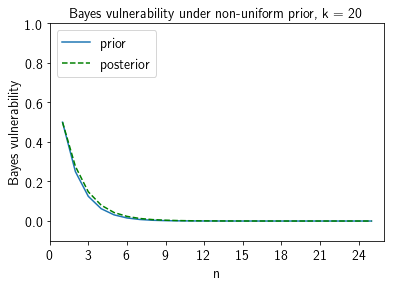

In [164]:
graph_it_bayes(n_range, k, df_half)